In [1]:
import os 
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import scikitplot as skplt

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# 1. Load Dataset

In [3]:
data_dir ='C:\\Users\\Keerthi\\Desktop\\Jigsaw\\CAPSTONE Project\\02 data'
os.chdir(data_dir)
data= pd.read_csv("sample_50K_V03.csv")

In [4]:
data.head()

,TKT_LOGGED_DATE1,CLEAN_INTENT,TICKET_DATE,TICKET_DATE_15D,POS_COUNT,POS_TKT_LOGGED_DATE1,POS_VINTAGE_SCORE,POS_SYS_TOUCH_PT,REN_COUNT,REN_TKT_LOGGED_DATE1,...,PLAN_TYPE_06,PLAN_TYPE_07,CLI_SNGL_MLTPL_PLCYHLDR_FLG_MULTIPLE,CLI_SNGL_MLTPL_PLCYHLDR_FLG_SINGLE,INCOME_BUK_04,INCOME_BUK_02,INCOME_BUK_03,INCOME_BUK_05,INCOME_BUK_01,mapped_pol_id
0,6/13/2018 7:33,DUEDATE/AMOUNT,6/13/2018 0:00,5/29/2018 0:00,0,0,0,0,3,6/12/2018 00:00,...,0,0,1,0,0,1,0,0,0,ZTAEBFBFOOVMWLAEOO
1,6/11/2018 11:23,PROBABLESURRENDER,6/11/2018 00:00,5/27/2018 0:00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,WLCGBFZTWLXRZTVMOO
2,4/21/2018 5:00,PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE,4/21/2018 0:00,4/6/2018 00:00,0,0,0,0,1,4/13/2018 0:00,...,0,0,0,1,0,0,0,0,1,CGAEVMBFXRVMOOAEZT
3,3/30/2019 10:24,PROBABLESURRENDER,3/30/2019 0:00,3/15/2019 0:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,XRZTAEVMWLZTXRDKXR
4,11/13/2018 5:42,POLICYSTATUS-ACTIVE/LAPSE,11/13/2018 0:00,10/29/2018 0:00,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,BFDKCGXRYSAEBFCGXR


# 2. Descriptive Stats

In [5]:

data.CLEAN_INTENT.value_counts()/len(data)

DUEDATE/AMOUNT                             0.252324
ACCOUNTVALUE/SURRENDERVALUE                0.146389
POLICYSTATUS-ACTIVE/LAPSE                  0.141827
PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY       0.105027
ECS/CREDITCARDINQUIRY                      0.067377
PREMIUMRECEIPTREQUEST                      0.066430
PROBABLESURRENDER                          0.051083
POSREQUESTSTATUSREQUIRED                   0.047295
BONUSINQUIRY                               0.039023
POLICYPACKDISPATCHSTATUS/CLARIFICATION     0.029050
PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE    0.020294
STATUSOFTHEPROPOSAL                        0.020082
LOANENQUIRY                                0.013800
Name: CLEAN_INTENT, dtype: float64

In [6]:

data['CLEAN_INTENT'].value_counts()


DUEDATE/AMOUNT                             13055
ACCOUNTVALUE/SURRENDERVALUE                 7574
POLICYSTATUS-ACTIVE/LAPSE                   7338
PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY        5434
ECS/CREDITCARDINQUIRY                       3486
PREMIUMRECEIPTREQUEST                       3437
PROBABLESURRENDER                           2643
POSREQUESTSTATUSREQUIRED                    2447
BONUSINQUIRY                                2019
POLICYPACKDISPATCHSTATUS/CLARIFICATION      1503
PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE     1050
STATUSOFTHEPROPOSAL                         1039
LOANENQUIRY                                  714
Name: CLEAN_INTENT, dtype: int64

In [7]:
data.describe()

,POS_COUNT,POS_VINTAGE_SCORE,POS_SYS_TOUCH_PT,REN_COUNT,REN_VINTAGE_SCORE,REN_SYS_TOUCH_PT,DELIVERY_STATUS,UNO_CS_COMM_COUNT,COMM_VINTAGE_SCORE,UNO_CS_COMM_SYS,...,PLAN_TYPE_05,PLAN_TYPE_06,PLAN_TYPE_07,CLI_SNGL_MLTPL_PLCYHLDR_FLG_MULTIPLE,CLI_SNGL_MLTPL_PLCYHLDR_FLG_SINGLE,INCOME_BUK_04,INCOME_BUK_02,INCOME_BUK_03,INCOME_BUK_05,INCOME_BUK_01
count,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,...,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000
mean,0.141054,1.103732,0.108448,0.389861,1.871200,0.179961,0.781693,0.985272,2.649645,0.258915,...,0.075649,0.022981,0.001102,0.216065,0.490462,0.048861,0.250527,0.131912,0.018593,0.256634
std,0.481330,3.523803,0.310949,1.036214,4.381829,0.384159,3.796765,4.212270,4.916195,0.438043,...,0.264438,0.149843,0.033174,0.411563,0.499914,0.215579,0.433321,0.338398,0.135085,0.436780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,16.000000,15.000000,1.000000,23.000000,15.000000,1.000000,655.000000,656.000000,14.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.dtypes

TKT_LOGGED_DATE1                        object
CLEAN_INTENT                            object
TICKET_DATE                             object
TICKET_DATE_15D                         object
POS_COUNT                                int64
POS_TKT_LOGGED_DATE1                    object
POS_VINTAGE_SCORE                        int64
POS_SYS_TOUCH_PT                         int64
REN_COUNT                                int64
REN_TKT_LOGGED_DATE1                    object
REN_VINTAGE_SCORE                        int64
REN_SYS_TOUCH_PT                         int64
DELIVERY_STATUS                          int64
UNO_CS_COMM_COUNT                        int64
COMM_TKT_DT                             object
COMM_VINTAGE_SCORE                       int64
UNO_CS_COMM_SYS                          int64
SCP_SMS_AGENT - OTHER                    int64
SCP_SMS_CUSTOMER AWARENESS               int64
SCP_SMS_LAPSATION & REVIVAL              int64
SCP_SMS_MOBILE NUMBER LINK               int64
SCP_SMS_PAYME

# 3. Data Transformation

In [9]:
data=data.drop(['mapped_pol_id','TKT_LOGGED_DATE1','TKT_LOGGED_DATE','TICKET_DATE','TICKET_DATE_15D','POS_TKT_LOGGED_DATE1','REN_TKT_LOGGED_DATE1','COMM_TKT_DT','MON_TKT_CLEARNACE_DATE','MON_TKT_BOUNCE_DATE','DUE_DATE_PAID'],axis=1)
print(data.shape)

(51739, 169)


### 3.1 Imputing Missing values in POL_PPT columns 

In [10]:
pol_ppt_mode=data.loc[:,"POL_PPT"].mode()
data['POL_PPT']=data['POL_PPT'].apply(lambda x:pol_ppt_mode if x=='999' else x)


### Combining sparsely populated columns


In [11]:
sparse=[['SCP_SMS_AGENT - OTHER','SCP_SMS_CUSTOMER AWARENESS','SCP_SMS_LAPSATION & REVIVAL','SCP_SMS_MOBILE NUMBER LINK','SCP_SMS_PAYMENT','SCP_SMS_POS','SCP_SMS_RENEWAL','SCP_SMS_TERMINATION',
'SCP_SMS_WEBSITE MESSAGE'],
['IVR_ACCOUNT VALUE/ SURRENDER VALUE','IVR_OTHERS','IVR_POLICY STATUS - ACTIVE / LAPSE','IVR_PREMIUM RECEIPT REQUEST','IVR_SYS'],
['UNO_EML_ACCOUNT VALUE/ SURRENDER VALUE','UNO_EML_BONUS INQUIRY','UNO_EML_CAMPAIGN RELATED INFORMATION','UNO_EML_DOCUMENTATION REQUIREMENT FOR POS CHANGES','UNO_EML_DUE DATE/ AMOUNT','UNO_EML_ECS / CREDIT CARD INQUIRY',
'UNO_EML_ECS DEBIT INCORRECT / NOT DONE','UNO_EML_FOLLOW UP - STATUS OF PROPOSAL','UNO_EML_KYC DOCUMENT STATUS','UNO_EML_MISS-SELLING / FRAUD BY AGENT','UNO_EML_OTHERS','UNO_EML_PERSONAL UPDATE',
'UNO_EML_POLICY BENEFITS / DEATH BENEFIT','UNO_EML_POLICY SERVICING - CLARIFICATION/ FOLLOW UP','UNO_EML_POLICY STATUS - ACTIVE / LAPSE','UNO_EML_POS REQUEST DELAY / ERROR',
'UNO_EML_PROCESSING DELAY / ERROR','UNO_EML_THIRD PARTY VERIFICATION'],
['MEGA_MEGA_OTHERS','MEGA_SCP_MG_1','MEGA_SCP_MG_10','MEGA_SCP_MG_11','MEGA_SCP_MG_12','MEGA_SCP_MG_13','MEGA_SCP_MG_14','MEGA_SCP_MG_2','MEGA_SCP_MG_3',
'MEGA_SCP_MG_4','MEGA_SCP_MG_5','MEGA_SCP_MG_6','MEGA_SCP_MG_7','MEGA_SCP_MG_9','MEGA_SYS'],
['SCP_EML_SCP_EM_10','SCP_EML_SCP_EM_13','SCP_EML_SCP_EM_14','SCP_EML_SCP_EM_15','SCP_EML_SCP_EM_16','SCP_EML_SCP_EM_17','SCP_EML_SCP_EM_18','SCP_EML_SCP_EM_19','SCP_EML_SCP_EM_3','SCP_EML_SCP_EM_4','SCP_EML_SCP_EM_5','SCP_EML_SCP_EM_6','SCP_EML_SCP_EM_7','SCP_EML_SCP_EM_8',
'SCP_EML_SCP_EM_9'],
['HELP_LINE_ACCOUNTVALUE/SURRENDERVALUE','HELP_LINE_BONUSINQUIRY','HELP_LINE_DUEDATE/AMOUNT','HELP_LINE_ECS/CREDITCARDINQUIRY','HELP_LINE_LOANENQUIRY','HELP_LINE_OTHERS',
'HELP_LINE_PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE','HELP_LINE_POLICYPACKDISPATCHSTATUS/CLARIFICATION','HELP_LINE_POLICYSTATUS-ACTIVE/LAPSE','HELP_LINE_POSREQUESTSTATUSREQUIRED','HELP_LINE_PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY',
'HELP_LINE_PREMIUMRECEIPTREQUEST','HELP_LINE_PROBABLESURRENDER','HELP_LINE_STATUSOFTHEPROPOSAL'],
['ind_surr'],
['POLICY_CHNL_03','POLICY_CHNL_06'],
['CLI_OCCUPATION_CAT_01','CLI_OCCUPATION_CAT_03','CLI_OCCUPATION_CAT_05','CLI_OCCUPATION_CAT_06','CLI_OCCUPATION_CAT_07','CLI_OCCUPATION_CAT_08'],
['CLI_EDUCATION_CAT_01'],
['PLAN_FAMILY_02','PLAN_FAMILY_04','PLAN_FAMILY_05','PLAN_FAMILY_06','PLAN_FAMILY_08','PLAN_FAMILY_10','PLAN_FAMILY_11','PLAN_FAMILY_12','PLAN_FAMILY_13','PLAN_FAMILY_14','PLAN_FAMILY_15'],
['PLAN_TYPE_06'],['INCOME_BUK_04','INCOME_BUK_05']]

In [12]:
club_cols = pd.DataFrame()
datacs=data
for i in sparse :
    lst=i[0]
    column_name=lst[0:7] 
    datacs['TO_CLUB'] =datacs[i].sum(axis = 1)
    club_cols[column_name] =datacs['TO_CLUB'].apply(lambda x : 0 if x == 0  else 1)
    datacs=datacs.drop(i,axis=1)

club_cols.columns =  club_cols.columns+'_OTHERS' 
datacs=pd.concat([datacs, club_cols], axis=1)
datacs=datacs.drop(['TO_CLUB'] ,axis=1)



### Dropping higly co-related variables

In [13]:

corr_matrix = datacs.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop)


['POS_VINTAGE_SCORE', 'POS_SYS_TOUCH_PT', 'REN_VINTAGE_SCORE', 'REN_SYS_TOUCH_PT', 'UNO_CS_COMM_COUNT', 'UNO_CS_COMM_SYS', 'MON_CLR_CHQ_VINTAGE_SCORE', 'MY_MON_CLR_SYS', 'MON_BNC_CHQ_VINTAGE_SCORE', 'MY_MON_BNC_SYS', 'DUE_VINTAGE_SCORE', 'DUE_STS_SYS', 'Lock_in_ind', 'PLAN_FAMILY_09', 'PLAN_CAT_01', 'PLAN_TYPE_03', 'PLAN_TYPE_05', 'UNO_EML_OTHERS', 'HELP_LI_OTHERS']


In [14]:

data_1=datacs.drop(to_drop, axis=1)
print(data_1.shape)
data_2=data_1.copy()

(51739, 63)


## Combining INTENTS


In [15]:
variable=['PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY','PREMIUMRECEIPTREQUEST']
data_1.CLEAN_INTENT.loc[(data_1['CLEAN_INTENT'].isin(variable))]='PREMIUMSERVICES'


In [16]:
variable=['PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE','ECS/CREDITCARDINQUIRY']
data_1.CLEAN_INTENT.loc[(data_1['CLEAN_INTENT'].isin(variable))] ='PAYMENTSERVICES'

In [17]:
variable=['POSREQUESTSTATUSREQUIRED','POLICYPACKDISPATCHSTATUS/CLARIFICATION','STATUSOFTHEPROPOSAL']
data_1.CLEAN_INTENT.loc[(data_1['CLEAN_INTENT'].isin(variable))]='STATUSENQUIRY'

In [18]:
variable=['BONUSINQUIRY','LOANENQUIRY']
data_1.CLEAN_INTENT.loc[(data_1['CLEAN_INTENT'].isin(variable))]='BONUS/LOANENQUIRY'

In [19]:

data_1['CLEAN_INTENT'].value_counts()


DUEDATE/AMOUNT                 13055
PREMIUMSERVICES                 8871
ACCOUNTVALUE/SURRENDERVALUE     7574
POLICYSTATUS-ACTIVE/LAPSE       7338
STATUSENQUIRY                   4989
PAYMENTSERVICES                 4536
BONUS/LOANENQUIRY               2733
PROBABLESURRENDER               2643
Name: CLEAN_INTENT, dtype: int64

# 4. Convert  Intents to Numeric labels

In [20]:
from sklearn import preprocessing
le_1 = preprocessing.LabelEncoder()
data_1['CLEAN_INTENT'] = le_1.fit_transform(data_1['CLEAN_INTENT'])
intents_mapping= {l : i for i,l in enumerate (le_1.classes_)}
intents_mapping

{'ACCOUNTVALUE/SURRENDERVALUE': 0,
 'BONUS/LOANENQUIRY': 1,
 'DUEDATE/AMOUNT': 2,
 'PAYMENTSERVICES': 3,
 'POLICYSTATUS-ACTIVE/LAPSE': 4,
 'PREMIUMSERVICES': 5,
 'PROBABLESURRENDER': 6,
 'STATUSENQUIRY': 7}

In [21]:

data_1['CLEAN_INTENT'].value_counts()


2    13055
5     8871
0     7574
4     7338
7     4989
3     4536
1     2733
6     2643
Name: CLEAN_INTENT, dtype: int64

# 5. Sampling

In [22]:

X_train, X_test, Y_train, Y_test = train_test_split(data_1.drop("CLEAN_INTENT", axis=1), data_1['CLEAN_INTENT'], test_size = 0.2,stratify=data_1['CLEAN_INTENT'], random_state=590)  


In [23]:
data_train = pd.concat([X_train.reset_index(drop='True'),Y_train.reset_index(drop='True')],axis=1)


In [24]:
#Reset the indexes on the validation sets — this is important later on
Y_test = Y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
# We will also copy the validation datasets to a dataframe to be able to merge later on
valid_x_df = pd.DataFrame(X_test)
valid_y_df = pd.DataFrame(Y_test)

# 6 Predefined Functions

### 6.1 To convert CLEAN_INTENT to binary format(One Vs All)

In [25]:

def features_clear_intent (df,variable):
    data=df
    data_new = data.drop("CLEAN_INTENT", axis=1)
    data_new['CLEAN_INTENT']=data['CLEAN_INTENT'].apply(lambda x : 1 if x == variable else 0)  
    return data_new
    


### 6.2 Give the Top-N features based on their feature importance

In [26]:

top=50
def featureselection_modelfit(alg, dtrain, predictors,target,top,name):
    col_name=name
    alg.fit(dtrain[predictors], dtrain[target])

    feat_importances = pd.Series(alg.feature_importances_, index=predictors)
    fi = pd.DataFrame(alg.feature_importances_, columns = [col_name], index=predictors)
    FI_sorted=fi.sort_values(col_name,ascending=0)
    imp_features=FI_sorted.head(50)
    return imp_features
        

### 6.3 Calculating WOE and IV

In [27]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

### 6.4 Variable Profiling

In [28]:
def data_vars_profile(df1,clean_intent,x):
    count = -1   
    for i in x:
        d3 = pd.DataFrame({},index=[])
        d3["n"] = df1.loc[df1['CLEAN_INTENT']==1 ].groupby([i])[i].count()       
        d3["N"] = df1[i].value_counts()
        d3["Percent"] = d3["n"]/d3["N"]
        d3["VAR_NAME"] = i
        d3["CLEAN_INTENT"] = clean_intent   
        d3 = d3.replace([np.inf, -np.inf], 0)
        count = count + 1
        if count == 0:
                
                var_df = d3
        else:
                
                var_df = var_df.append(d3)
    
    return(var_df)       


### 6.5 Feature selection with 'N' Significance level

In [29]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, N, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > N:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    #rint('columns in IFFFF-->',columns)
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

### 6.6 To Calculate ROC for MutiClass Target Vatiable

In [30]:

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)

### 6.7 To Plot ROC for MutiClass Target Vatiable

In [31]:
def multiclass_roc_auc_plot(truth, pred, average="macro"):
    SMALL_SIZE =8
    matplotlib.rc('font', size=SMALL_SIZE)
    matplotlib.rc('axes', titlesize=SMALL_SIZE)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes=8
    
    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(truth[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycle(['blue', 'red', 'green'])
    for i in (range(n_classes)):
        plt.plot(fpr[i], tpr[i], 
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()


### 6.8 To calculate Metric to Validate Model

In [106]:
from sklearn.metrics import precision_score, recall_score,f1_score,classification_report,accuracy_score,confusion_matrix,cohen_kappa_score

def evaluate_model(Y_test, Y_pred, Ypred_proba = None):
    print('ROC-AUC score of the model   :',multiclass_roc_auc_score(Y_test,Y_pred))
    print('F1 Score                     : {}\n'.format(f1_score(Y_test, Y_pred,pos_label='positive',average='macro')))
    print('Precision                    : {}\n'.format(precision_score(Y_test, Y_pred,pos_label='positive',average='macro')))
    print('Recall                       : {}\n'.format(recall_score(Y_test, Y_pred,pos_label='positive',average='macro')))
    print('Accuracy of the model        : {} \n'.format(accuracy_score(Y_test, Y_pred)))
    print('Confusion matrix             : \n{}\n'.format(confusion_matrix(Y_test, Y_pred)))
    print('Classification report        : \n{}\n'.format(classification_report(Y_test, Y_pred)))
    multiclass_roc_auc_plot(Y_test, Y_pred)
    #SMALL_SIZE =12
   # matplotlib.rc('font', size=SMALL_SIZE)
    #matplotlib.rc('axes', titlesize=SMALL_SIZE)

### 6.9 To Plot Accuracies for each model in each Feature selection process

In [33]:
def func_graph(results,names):

    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    width = 0.5        
    bars=plt.bar(names,results, width, align='center')
    ax.set_xticklabels(names)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .005, yval)
    plt.show()

### 6.10 To Calculate Accuracy,ROC, plot ROC,plot confusion matrix & classification report for TOP-3 Intents

In [111]:
# Accuracy & classification report fot TOP-3

def metric_calc(classifier, X_train, label, X_test, valid_y):
    
    classifier.fit(X_train, label)
    n = 3
    classifier.probability = True
    probas = classifier.predict_proba(X_test)
    predictions = classifier.predict(X_test)

    top_n_predictions = np.argsort(probas, axis = 1)[:,-n:] #probability 

    top_class = classifier.classes_[top_n_predictions]#classes

    top_class_df = pd.DataFrame(data=top_class)
    predictions_df= pd.DataFrame(data=predictions)
    
    #results = pd.concat([valid_y.reset_index(drop='True'),X_test.reset_index(drop='True')],axis=1)

    results = pd.merge(valid_y, X_test, left_index=True, right_index=True)
    results = pd.merge(results, top_class_df, left_index=True, right_index=True)
    results['Actual_predict_class']=predictions_df

    leng =results.shape[0]
    predicted_class=[]
    results['predicted_class']=0
    for i in range(0,leng) :

        if (results.iloc[:,0][i] == results[0][i]) :
            predicted_class.append(results[0][i])
           
        elif (results.iloc[:,0][i] == results[1][i]) :
            predicted_class.append(results[1][i])
            
        else :
            predicted_class.append(results[2][i])
    results['predicted_class']=predicted_class
    top3_conditions = [(results.iloc[:,0] == results[0]),
                        (results.iloc[:,0] == results[1]),
                        (results.iloc[:,0] == results[2])]
    top3_choices = [1, 1, 1]

    top1_conditions = [(results.iloc[:,0] == results[2])]
    top1_choices = [1]
    
    results['Top_3_Successes'] = np.select(top3_conditions, top3_choices, default=0)
    results['Top_1_Successes'] = np.select(top1_conditions, top1_choices, default=0)
    accuracy_Top_3 = round(sum(results['Top_3_Successes'])/results.shape[0],3)*100
    accuracy_Top_1 = round(sum(results['Top_1_Successes'])/results.shape[0],3)*100
    
    results.to_csv("results_clubbed_intents.csv")
    print("Results: ")
    print("Top 1 Accuracy Rate = ", accuracy_Top_1)
    print("Top 3 Accuracy Rate = ", accuracy_Top_3)
    evaluate_model(valid_y, results['predicted_class'], probas)
    
    # to Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix( valid_y, results['predicted_class'],figsize=(5,5))
    return accuracy_Top_3

### 6.11 To Train and Evaluate all the 7 Feature Selections at a time

In [35]:
def func_models_one_tuned(i) :
    count=0
    count=count+1

    print('################################ features_selected ##################################>>>>',count)
    X = X_train[i]
    Y = Y_train
    x_test = X_test[i]
    seed = 7
    # prepare models
    models = []
    models.append(('LR', 'LogisticRegression  ', LogisticRegression(multi_class='multinomial', solver='newton-cg',penalty= 'l2')))
    models.append(('RF',' RandomForestClassifier  ', RandomForestClassifier(n_estimators=100, random_state=700,max_depth=5,
                                                                            max_features=4,criterion='gini')))
    models.append(('XGB',' XGBClassifier  ', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                                           colsample_bynode=1, colsample_bytree=0.8, gamma=0,
                                                           learning_rate=0.1, max_delta_step=0, max_depth=5,
                                                           min_child_weight=5, missing=None, n_estimators=140, 
                                                           objective='multi:softprob', subsample=0.8)))
    models.append(('LGBM',' LGBMClassifier ', LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.4,
                                                            gamma=0, importance_type='split', learning_rate=0.1, max_depth=4,
                                                            min_child_samples=20, min_child_weight=8,
                                                            n_estimators=180, nthread=4, num_leaves=31,
                                                            objective=None, subsample=0.4,
                                                            subsample_for_bin=200000, subsample_freq=0)))
    models.append(('ADA',' AdaBoostClassifier ', AdaBoostClassifier(n_estimators=60,max_depth=6,min_samples_split=120, 
                                                                                    min_samples_leaf=50, subsample=0.6, 
                                                                                    random_state=100,max_features=5)))
    models.append(('GBM',' GradientBoostingClassifier ', GradientBoostingClassifier(learning_rate=0.1,
                                                                                    n_estimators=60,max_depth=9,min_samples_split=1200, 
                                                                                    min_samples_leaf=60, subsample=0.8, 
                                                                                    random_state=10,max_features=7)))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'

    for name,label, model in models:
            #print('model beign processed ------->',label)
            print('model beign processed =============================>',label,'<===========================')
            cv_results=metric_calc(model,X,Y, x_test,Y_test)
            msg = "%s: %f " % (label, cv_results)
            #print(msg)
            results.append(cv_results)
            names.append(name)
    # barplot algorithm comparison
    func_graph_1(results,names)

### 6.12 To Train and Evaluate on all models with one of the selected Feature Selections techniques

In [37]:
def func_models_one(i) :
    count=0
    count=count+1

    print('################################ features_selected ##################################>>>>',count)
    X = X_train[i]
    Y = Y_train
    x_test = X_test[i]
    seed = 7
    # prepare models
    models = []
    models.append(('LR', 'LogisticRegression  ', LogisticRegression(multi_class='multinomial', solver='newton-cg')))
    models.append(('RF',' RandomForestClassifier  ', RandomForestClassifier(n_estimators=100, random_state=700,max_depth=5,max_features=4,criterion='gini')))
    models.append(('XGB',' XGBClassifier  ', XGBClassifier()))
    models.append(('LGBM',' LGBMClassifier ', LGBMClassifier()))
    models.append(('ADA',' AdaBoostClassifier ', AdaBoostClassifier()))
    models.append(('GBM',' GradientBoostingClassifier ', GradientBoostingClassifier()))
    #models.append(('SVM',' SVM' , SVC(probability=True)))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'

    for name,label, model in models:
            #print('model beign processed ------->',label)
            print('model beign processed =============================>',label,'<===========================')
            cv_results=metric_calc(model,X,Y, x_test,Y_test)
            msg = "%s: %f " % (label, cv_results)
            #print(msg)
            results.append(cv_results)
            names.append(name)
    # barplot algorithm comparison
    func_graph(results,names)

### 6.13 To calculate Kolmogorov Smirnov (KS -statistics)

In [38]:
def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    print(decile.head())
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['KS'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

### 6.14 For highlighting KS value 

In [39]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('KS',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['KS'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

### 6.15 For calculating Gains Table

In [40]:
def gains(data,decile_by,target,score):
    inputs = list(decile_by)
    inputs.extend((target,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[target]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']
    print(agg1.head())
    plots(agg1,target,'Distribution')

### 6.16 For Plotting Gains Chart and Lift Chart

In [120]:
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

# 7 .Feature selection

### 7.1 Weight of Evidence(WOE)&Information value (IV)

In [42]:
target = Y_train.unique()
iv_data =[]
IV = pd.DataFrame()
j=len(target)
for i in range(0,j):
    #data_new = data_train.drop("CLEAN_INTENT", axis=1)
    print('for INTENT -->',target[i])
    data_new = features_clear_intent(data_train,target[i])
    df=data_new
    final_iv, IV = data_vars(data_new,(data_new['CLEAN_INTENT'] ))
    IV['CLEAN_INTENT']= target[i] 
    iv_data.append(IV)
    

for INTENT --> 2
for INTENT --> 6
for INTENT --> 4
for INTENT --> 5
for INTENT --> 3
for INTENT --> 0
for INTENT --> 1
for INTENT --> 7


In [43]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)


,index,IV,CLEAN_INTENT
44,POL_COV_TERM,0.664582,7
5,CLI_HNI_IND_N,0.465369,7
27,PLAN_CAT_03,0.408467,7
11,CLI_SNGL_MLTPL_PLCYHLDR_FLG_SINGLE,0.378689,7
61,new_policy,0.324747,7
13,DELIVERY_STATUS,0.314068,7
12,COMM_VINTAGE_SCORE,0.305848,7
34,PLAN_TYPE_01,0.298245,7
15,ECS_FLAG_No,0.255403,7
7,CLI_OCCUPATION_CAT_02,0.246668,7


In [44]:
iv_info=pd.concat(iv_data, axis=0)


In [45]:
iv_info.groupby('CLEAN_INTENT')['IV'].max()

CLEAN_INTENT
0    0.224803
1    1.349169
2    0.093581
3    0.102163
4    0.291715
5    0.116496
6    0.218239
7    0.664582
Name: IV, dtype: float64

##### Arranging the Features group by each intent in ascending order of their Information value

In [46]:
iv_sorted = iv_info.groupby(["CLEAN_INTENT"]).apply(lambda x: x.sort_values(["IV"], ascending = False)).reset_index(drop=True)



##### Selecting Top 15 from each of the Intents

In [50]:

iv_top50=iv_sorted.groupby('CLEAN_INTENT').head(50)
iv_top50.shape

(400, 3)

In [52]:
iv_top50.drop_duplicates(subset =["VAR_NAME"], inplace = True) 
iv_top50 = iv_top50.reset_index()
iv_top50.shape

(62, 5)

In [72]:
features_selected_iv_1=iv_top50.set_index('VAR_NAME')
features_selected_iv=features_selected_iv_1.head(35)

### 7.3 Feature selection - ExtraTreesClassifier


In [56]:
target='CLEAN_INTENT'
predictors = [x for x in data_train.columns if x not in [target]]
etc0 = ExtraTreesClassifier(n_estimators=10)

features_selected_etc= featureselection_modelfit(etc0, data_train, predictors,target,50,'Extratrees')

In [57]:
features_selected_etc = features_selected_etc.reset_index()

### 7.4 Feature selection - GradientBoostingClassifier

In [58]:
target='CLEAN_INTENT'
predictors = [x for x in data_train.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)

features_selected_gbm= featureselection_modelfit(gbm0, data_train, predictors,target,50,'GBM')

In [59]:
features_selected_gbm = features_selected_gbm.reset_index()

### 7.5 Feature selection - Random ForestClassifier


In [60]:
target='CLEAN_INTENT'
predictors = [x for x in data_train.columns if x not in [target]]
RF0 = RandomForestClassifier(random_state=10)

features_selected_rf= featureselection_modelfit(RF0, data_train, predictors,target,50,'RF')

In [61]:
features_selected_rf = features_selected_rf.reset_index()

###                                               7.6 Feature selection- XGBoost Model

In [62]:
import xgboost as xgb
from xgboost import XGBClassifier
target='CLEAN_INTENT'
predictors = [x for x in data_train.columns if x not in [target]]
xgbm= XGBClassifier(random_state=10)
features_selected_xgb= featureselection_modelfit(xgbm, data_train, predictors,target,50,'XGBM')

In [63]:
features_selected_xgb = features_selected_xgb.reset_index()

### 7.7 Chi-Squared or SelectKBest

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(X_train.abs(), Y_train)
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=X_train.columns)
chi_sq = chi_sq.reset_index()
chi_sq.sort_values('Chi_Square',ascending=0)
features_selected_chi=chi_sq.head(50)

### 7.8 Recursive Feature Elimination

In [65]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 50)
fit = rfe.fit(X_train, Y_train)

In [66]:

from pandas import DataFrame
features_selected_RFE = DataFrame(rfe.support_, columns = ["RFE"], index=X_train.columns)
features_selected_RFE = features_selected_RFE.reset_index()

### 7.9 Aggregating all the features selected into a Dataframe

In [67]:
features_selected_iv.head()

,level_0,index,IV,CLEAN_INTENT
VAR_NAME,,,,
POLICY_CHNL_04,0,0,0.22,0
PLAN_CAT_04,1,1,0.22,0
new_policy,2,2,0.11,0
POLICY_CHNL_01,3,3,0.10,0
PLAN_TYPE_04,4,4,0.09,0


In [167]:
from functools import reduce
dfs = [features_selected_etc,features_selected_gbm,features_selected_xgb,features_selected_rf,features_selected_chi,features_selected_RFE]
final_results_1 = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)
final_results_1 = pd.concat([final_results_1.reset_index(drop='True'),iv_top50['IV'].reset_index(drop='True')],axis=1)
final_results=final_results_1.head(35)
final_results.head()

,index,Extratrees,GBM,XGBM,RF,Chi_Square,RFE,IV
0,POL_COV_TERM,0.10,0.06,0.04,0.10,55433.31,False,0.22
1,COMM_VINTAGE_SCORE,0.06,0.01,0.01,0.07,15821.91,False,0.22
2,REN_COUNT,0.05,0.04,0.02,0.04,2540.79,True,0.11
3,DELIVERY_STATUS,0.05,0.05,0.02,0.05,14798.35,False,0.10
4,POL_PPT,0.05,0.08,0.06,0.05,678624.12,False,0.09


### 7.10 Vote each variable

In [76]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square','GBM','XGBM']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(35,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)


In [178]:
score_table['final_score'] = score_table.sum(axis=1)

In [166]:
score_table=score_table.sort_values('final_score',ascending=0)


## 4.9 Multicollinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [93]:
features = X_train[list(score_table[score_table['final_score'] >= 7]['index'])]

In [94]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [96]:
features_selected_final=list(vif['Features'])

In [112]:
len(features_selected_final)

26

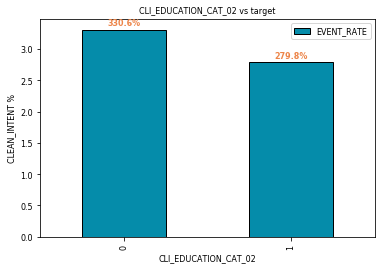

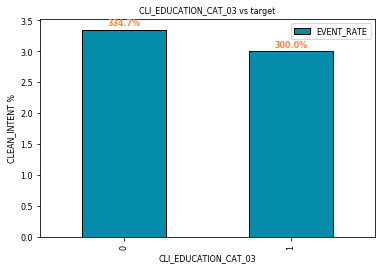

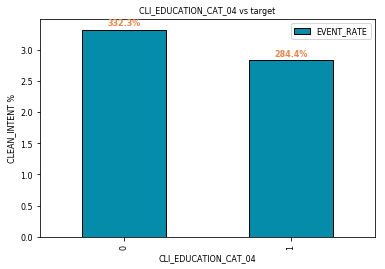

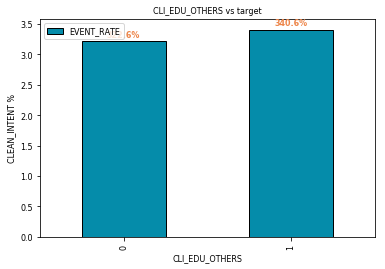

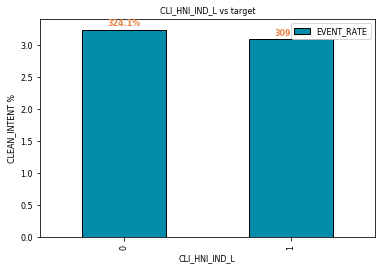

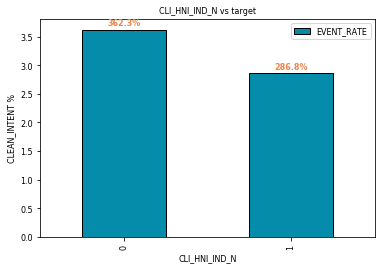

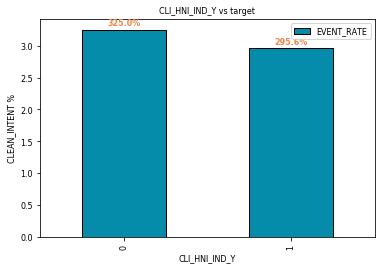

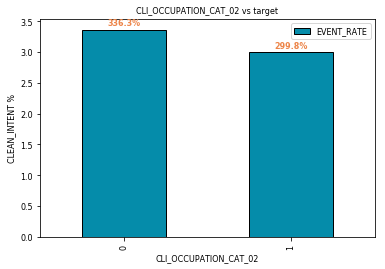

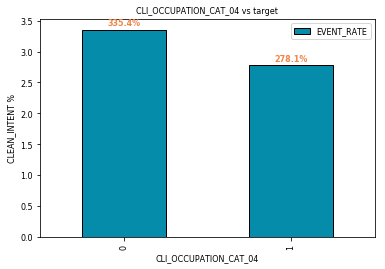

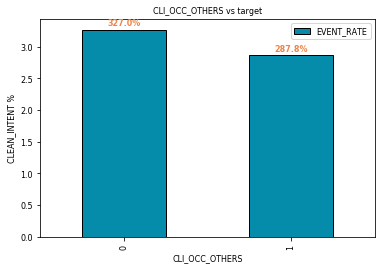

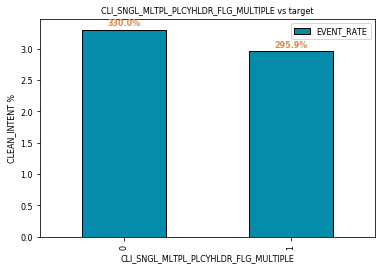

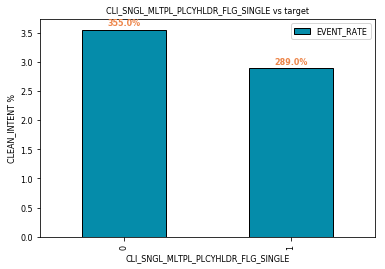

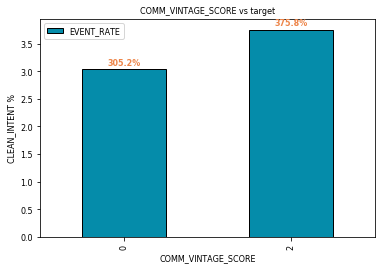

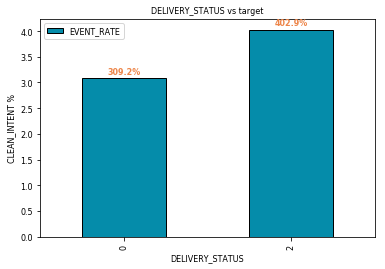

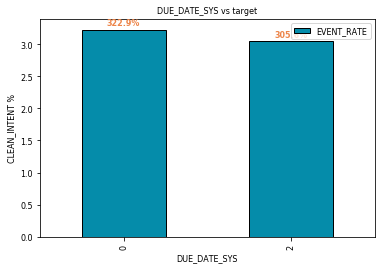

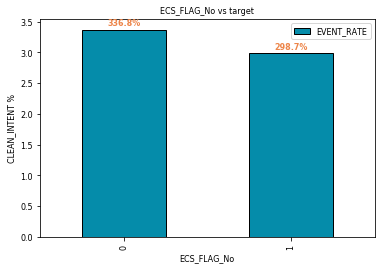

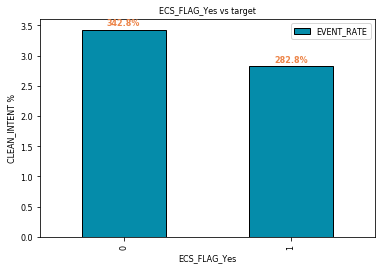

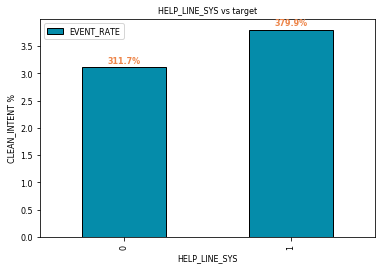

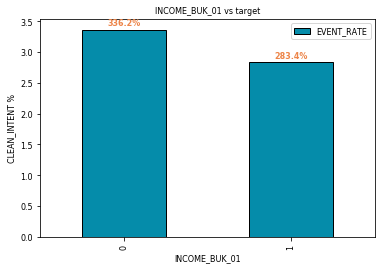

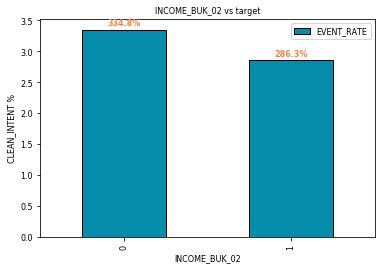

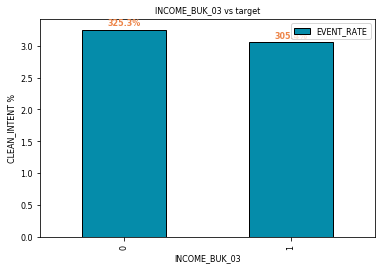

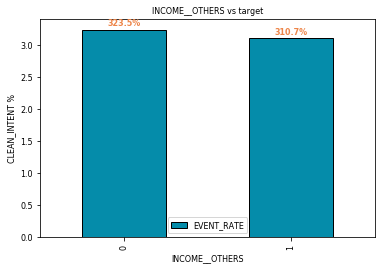

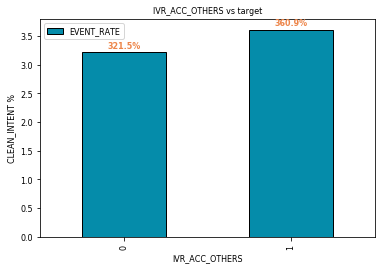

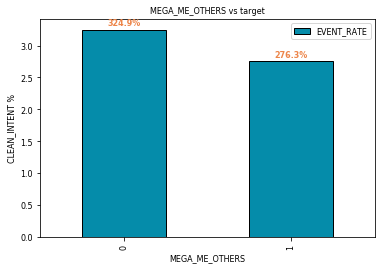

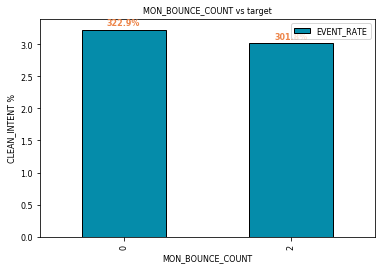

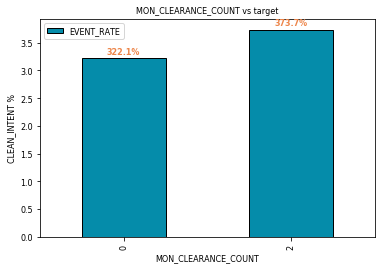

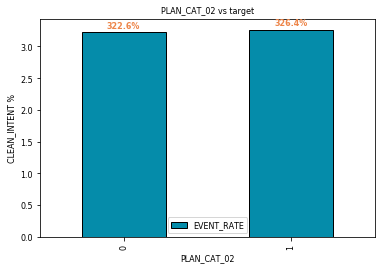

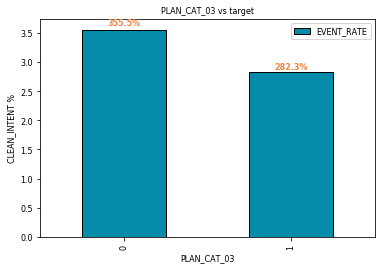

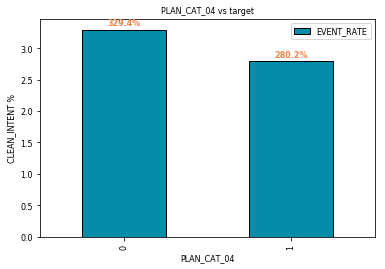

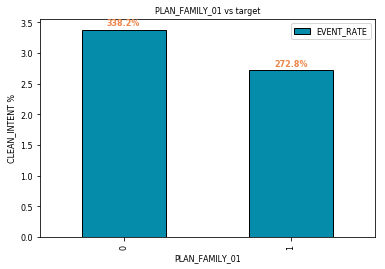

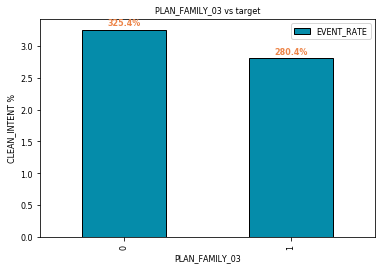

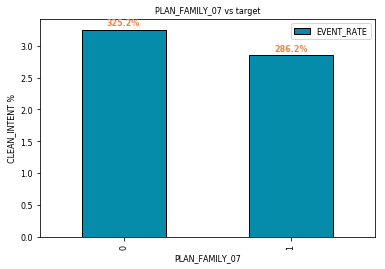

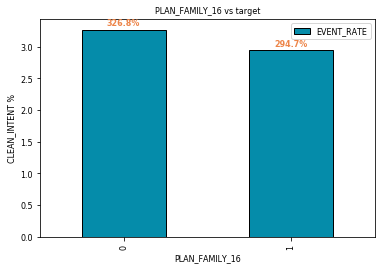

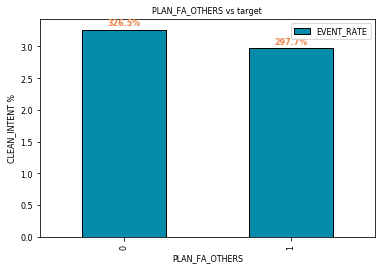

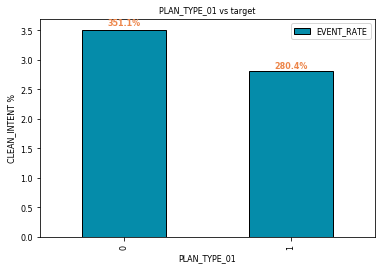

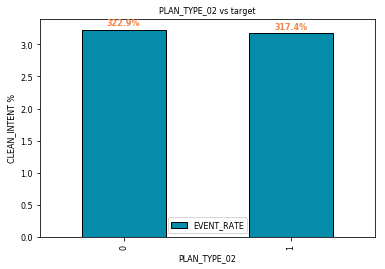

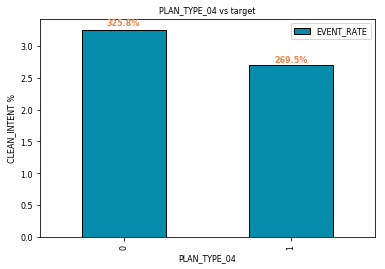

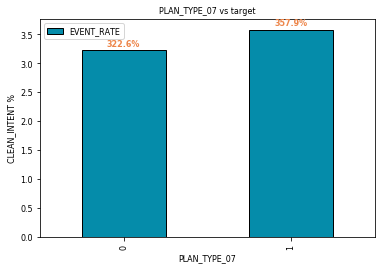

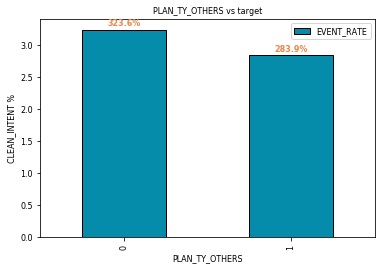

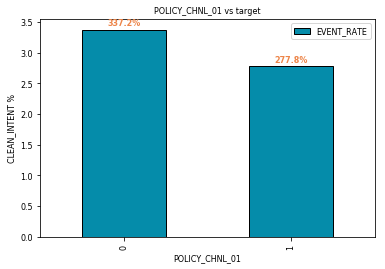

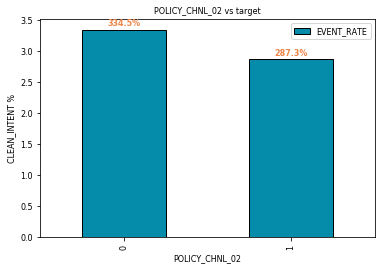

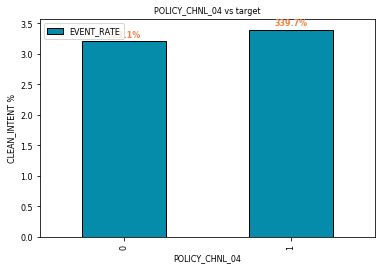

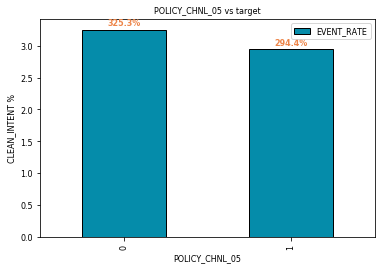

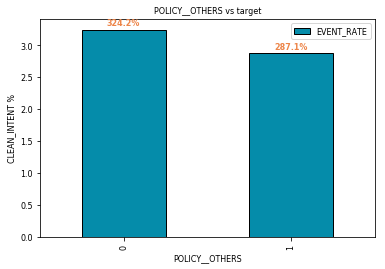

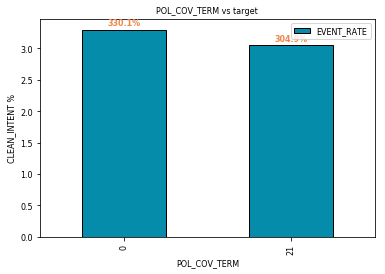

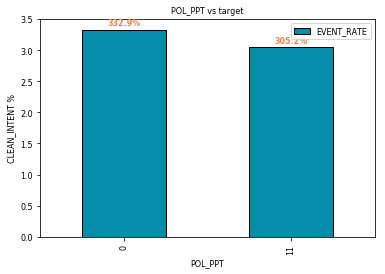

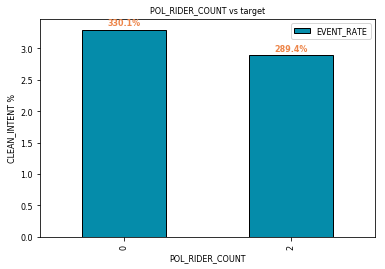

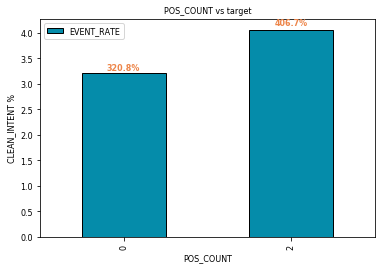

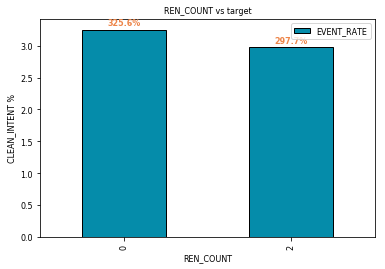

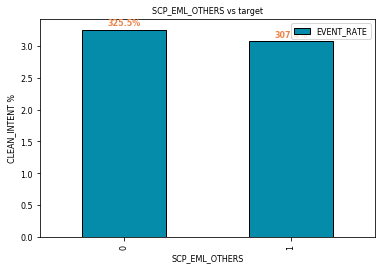

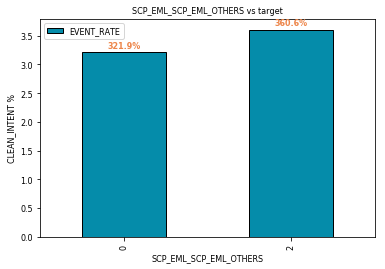

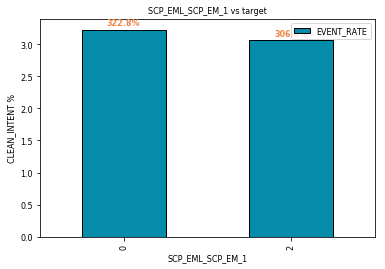

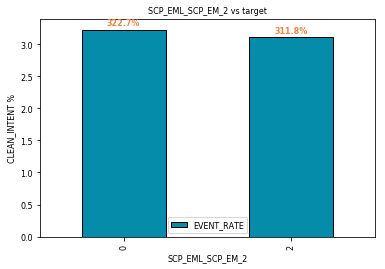

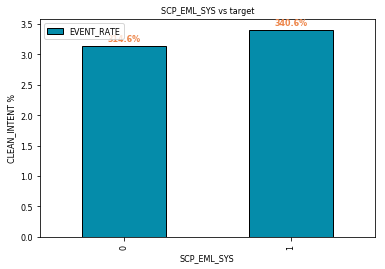

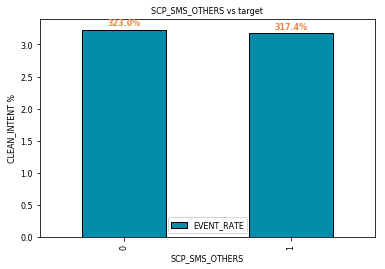

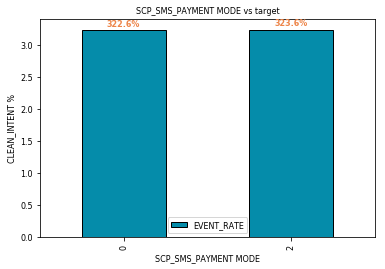

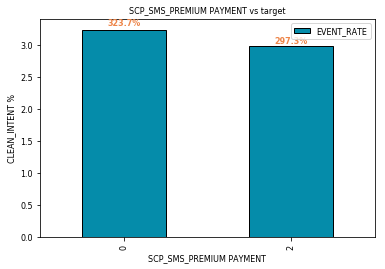

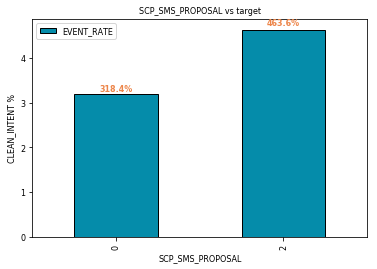

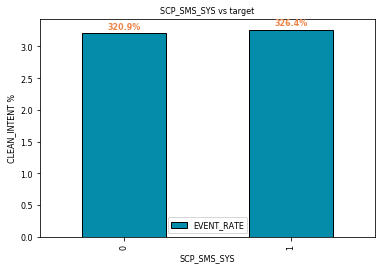

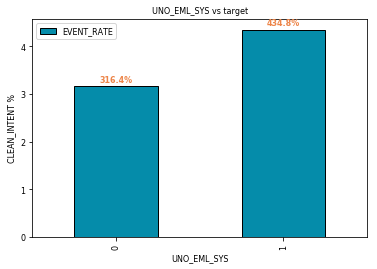

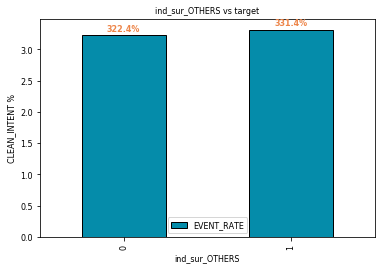

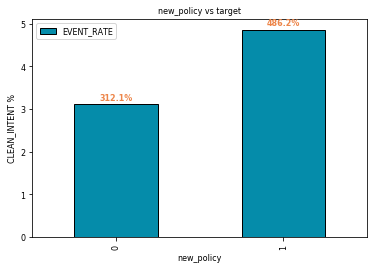

In [177]:
bar_color = '#058caa'
num_color = '#ed8549'

final_iv,_ = data_vars(data_1,data_1['CLEAN_INTENT'])
final_iv = final_iv[(final_iv.VAR_NAME != 'CLEAN_INTENT')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('target'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('CLEAN_INTENT') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

# 8 Modelling


##### Updating X_train and X_test with features selected 

In [104]:
x_train=X_train[features_selected_final]
x_test=X_test[features_selected_final]

## 8.2 Performance Tuning of the Models to be used

### 8.2.1 Logistic Regression - Hyper parameter tuning

In [62]:
mod=model_selection.GridSearchCV(LogisticRegression(),param_grid={"penalty":["l1"],"C":np.random.uniform(0,120,2)})
mod.fit(x_train,Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1'], 'C': array([103.18527, 103.3489 ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
mod.best_estimator_

LogisticRegression(C=103.3489010611569, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [69]:
log_tuned=LogisticRegression(C=103.3489010611569, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### 8.2.2 Random Forest - Hyper parameter tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, Y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   23.0s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   46.3s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [67]:
rf_random.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rf_tuned= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 8.2.3 Gradient Boosting - Hyper parameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [50,100,150]
max_depth = [4,5,6]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb = GradientBoostingClassifier()

gf_tune = GridSearchCV(estimator = gb, param_grid = grid, cv = 2, verbose=2, n_jobs = -1)
gf_tune.fit(X_train, Y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 47.0min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150], 'max_depth': [4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [28]:
gf_tune.best_params_

{'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
gbm_tuned = GradientBoostingClassifier(**gf_tune.best_params_)


### 8.2.4 Light Gradient Boosting - Hyper parameter tuning

In [74]:
# latest one 
from sklearn.model_selection import GridSearchCV
param_test = {
 'max_depth':[2,3,4,5,6],
 "learning_rate" : [0.01,0.05,0.1],
 "num_leaves": [300,900,1200],
 'min_child_weight':[4,5,6,7,8],
 'n_estimators' :[100,140,200]}
lg = LGBMClassifier()
gsearchlgbm = GridSearchCV(lg, n_jobs=-1, param_grid=param_test, cv = 3, verbose=5)
gsearchlgbm.fit(x_train,Y_train)


Fitting 3 folds for each of 675 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 50.6min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 65.9min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 84.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 110.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 131.9min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 170.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6], 'learning_rate': [0.01, 0.05, 0.1], 'num_leaves': [300, 900, 1200], 'min_child_weight': [4, 5, 6, 7, 8], 'n_estimators': [100, 140, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [77]:
gsearchlgbm.best_estimator_
#clf = GradientBoostingClassifier(**gsearchlgbm.best_params_)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=6,
        min_child_samples=20, min_child_weight=4, min_split_gain=0.0,
        n_estimators=140, n_jobs=-1, num_leaves=300, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [78]:
lgbm_tuned=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=6,
        min_child_samples=20, min_child_weight=4, min_split_gain=0.0,
        n_estimators=140, n_jobs=-1, num_leaves=300, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### 8.2.5 Extreme Gradient Boosting - Hyper parameter tuning

In [182]:
from sklearn.model_selection import GridSearchCV
param_test2 = {"max_depth": [10,30,50],

              "min_child_weight" : [1,3,6],

              "n_estimators": [200],

              "learning_rate": [0.05, 0.1,0.16],}
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_test2, cv = 3, 

                                   verbose=10, n_jobs=-1)
gsearchxgbm .fit(X_train,Y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 12.1min finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 12.1min remaining:    0.0s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [6], 'min_child_weight': [3], 'n_estimators': [200], 'learning_rate': [0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [183]:
gsearchxgbm.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=3, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [185]:
xgb_tuned = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=3, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

### 8.2.6 Adaptive Boosting - Hyper parameter tuning

In [196]:
model = AdaBoostClassifier()

param_dist = {"n_estimators": [100,200],
              "learning_rate": [0.05, 0.1,0.16],}

grid_search_ada = GridSearchCV(model, param_grid=param_dist, cv = 3,verbose=10, n_jobs=-1)
grid_search_ada .fit(x_train,Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   41.5s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:  1.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  1.1min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  1.5min remaining:   55.6s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  1.5min remaining:   34.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  1.5min remaining:   17.8s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [198]:
grid_search_ada.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.16, n_estimators=200, random_state=None)

In [192]:
ada_tuned=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.16, n_estimators=200, random_state=None)

## 8.2 Training and Evaluation of all models with features selected

################################ features_selected ##################################>>>> 1
model beign processed =============================> LogisticRegression   <===========================
Results: 
Top 1 Accuracy Rate =  35.0
Top 3 Accuracy Rate =  69.8
ROC-AUC score of the model   : 0.7656197567947721
F1 Score                     : 0.6101578545220501

Precision                    : 0.7992171834304798

Recall                       : 0.5785495917588461

Accuracy of the model        : 0.6983958252802474 

Confusion matrix             : 
[[1190    2  180    4   30   77    0   32]
 [  54  226  197    0   16   45    1    8]
 [   2    1 2566    0   14   12    1   15]
 [  70    1  267  383   75   70    0   41]
 [ 137    2  335    3  903   80    0    8]
 [ 107    1  187    4   94 1354    1   26]
 [ 127    4  198    2   96   43   45   13]
 [  69    4  212    2   90   61    0  560]]

Classification report        : 
              precision    recall  f1-score   support

           0       

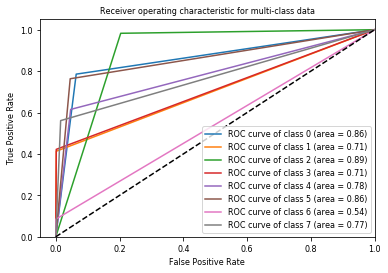

model beign processed =============================>  RandomForestClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  33.800000000000004
Top 3 Accuracy Rate =  67.60000000000001
ROC-AUC score of the model   : 0.727519148836459
F1 Score                     : 0.5054529324885834

Precision                    : 0.5910170179192724

Recall                       : 0.5070357659688902

Accuracy of the model        : 0.6755894858909934 

Confusion matrix             : 
[[1160    0   79    0  237   28    0   11]
 [   4    0  442    0   24   75    0    2]
 [   0    0 2610    0    1    0    0    0]
 [  12    0  478  200   81  102    0   34]
 [  42    0  511    0  834   81    0    0]
 [   1    0   81    0   92 1572    0   28]
 [  33    0  339    0  100   45    0   11]
 [  29    0  279    0    7   68    0  615]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1515
           1       0.00   

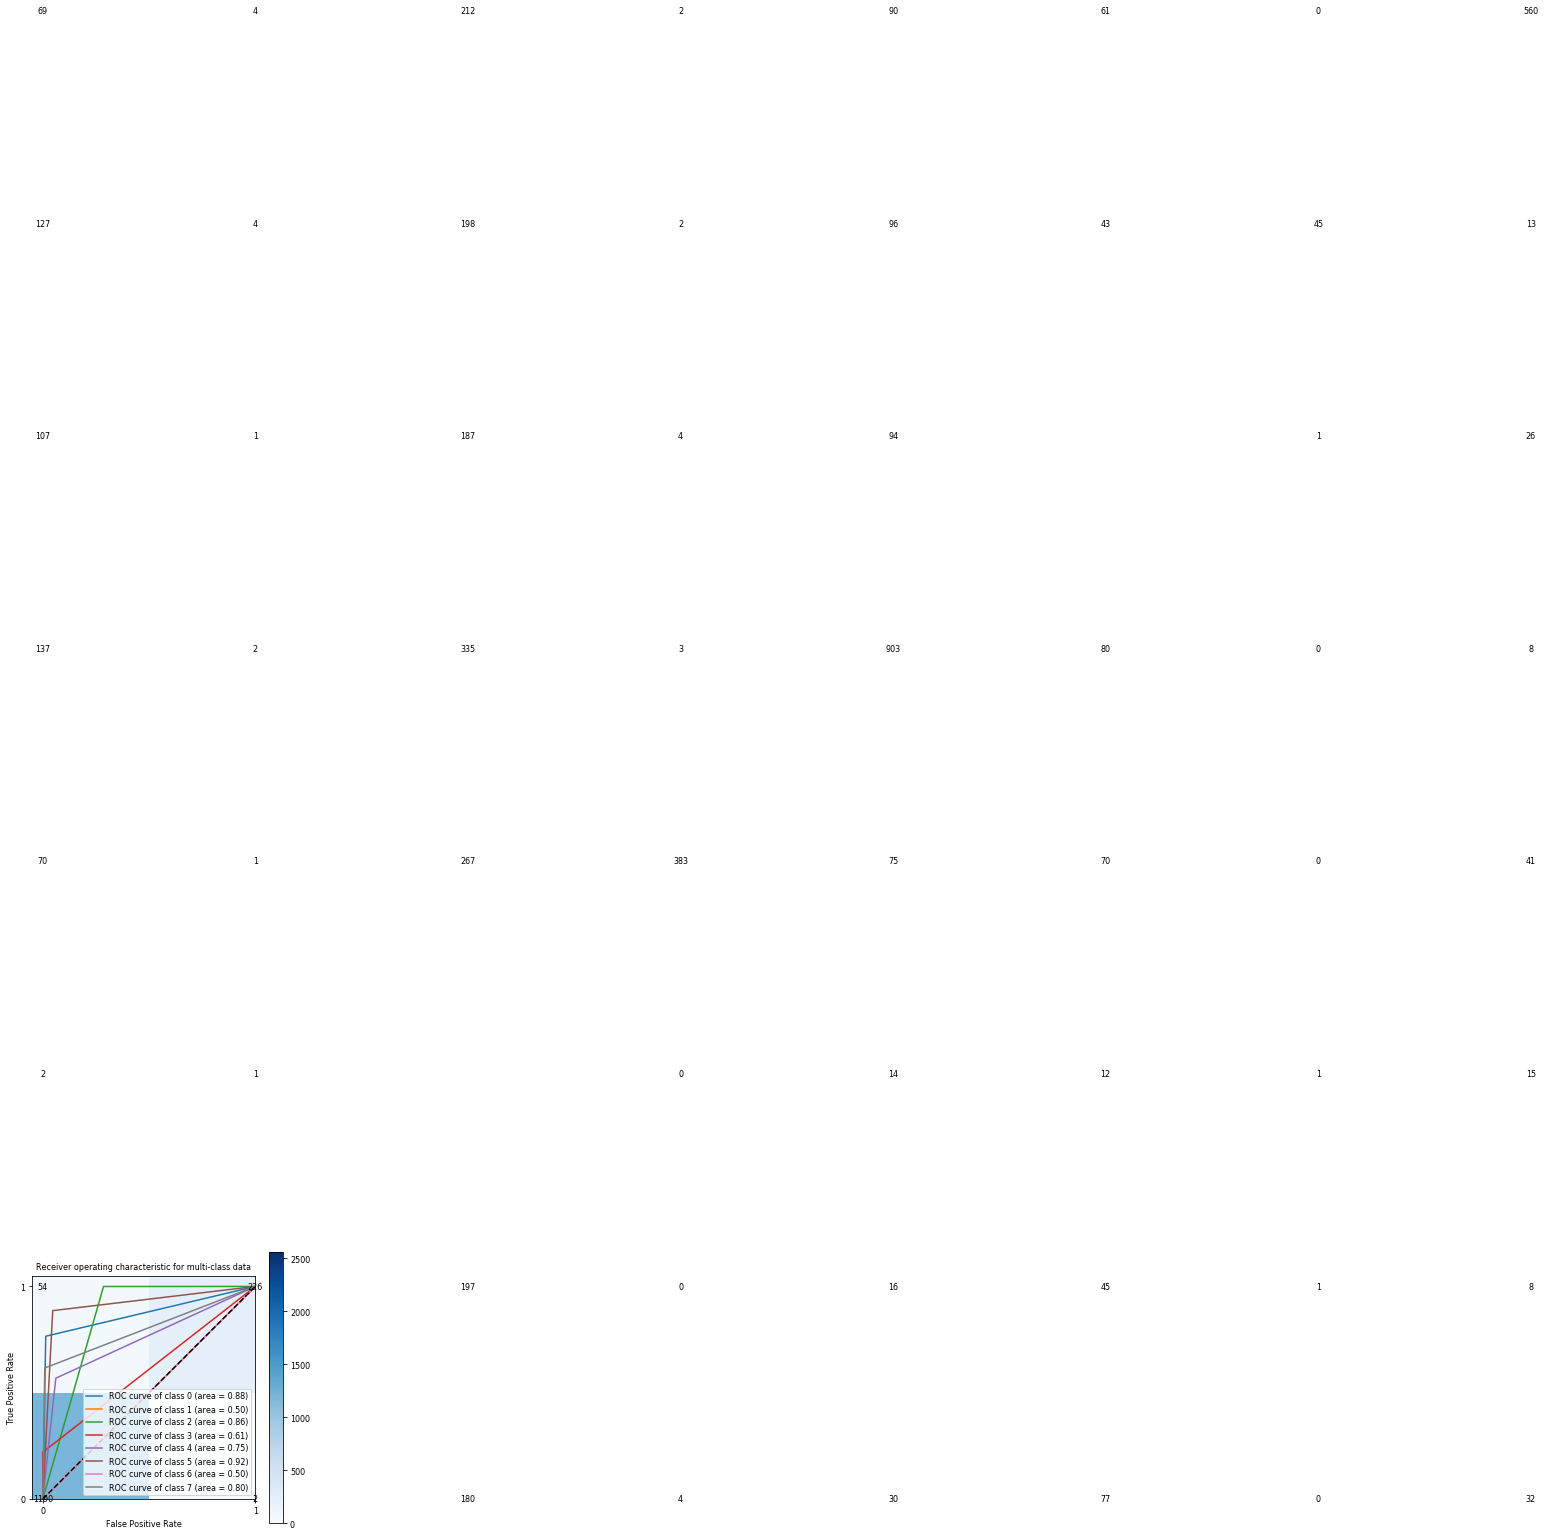

model beign processed =============================>  XGBClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  35.699999999999996
Top 3 Accuracy Rate =  71.1
ROC-AUC score of the model   : 0.7701367273175833
F1 Score                     : 0.6085118263372569

Precision                    : 0.8087490729620468

Recall                       : 0.5854321993243543

Accuracy of the model        : 0.7113451874758407 

Confusion matrix             : 
[[1277    1  102    1   32   68    0   34]
 [  52  208  202    1   16   53    0   15]
 [   3    0 2586    1    4    9    0    8]
 [  59    0  233  419   66   79    0   51]
 [ 133    0  337    2  896   86    0   14]
 [  86    1  203    2   87 1357    1   37]
 [ 146    1  198    1   93   47   15   27]
 [  61    0  178    4  102   50    0  603]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.70      0.84      0.77      1515
           1       0.99      0.38      0.55    

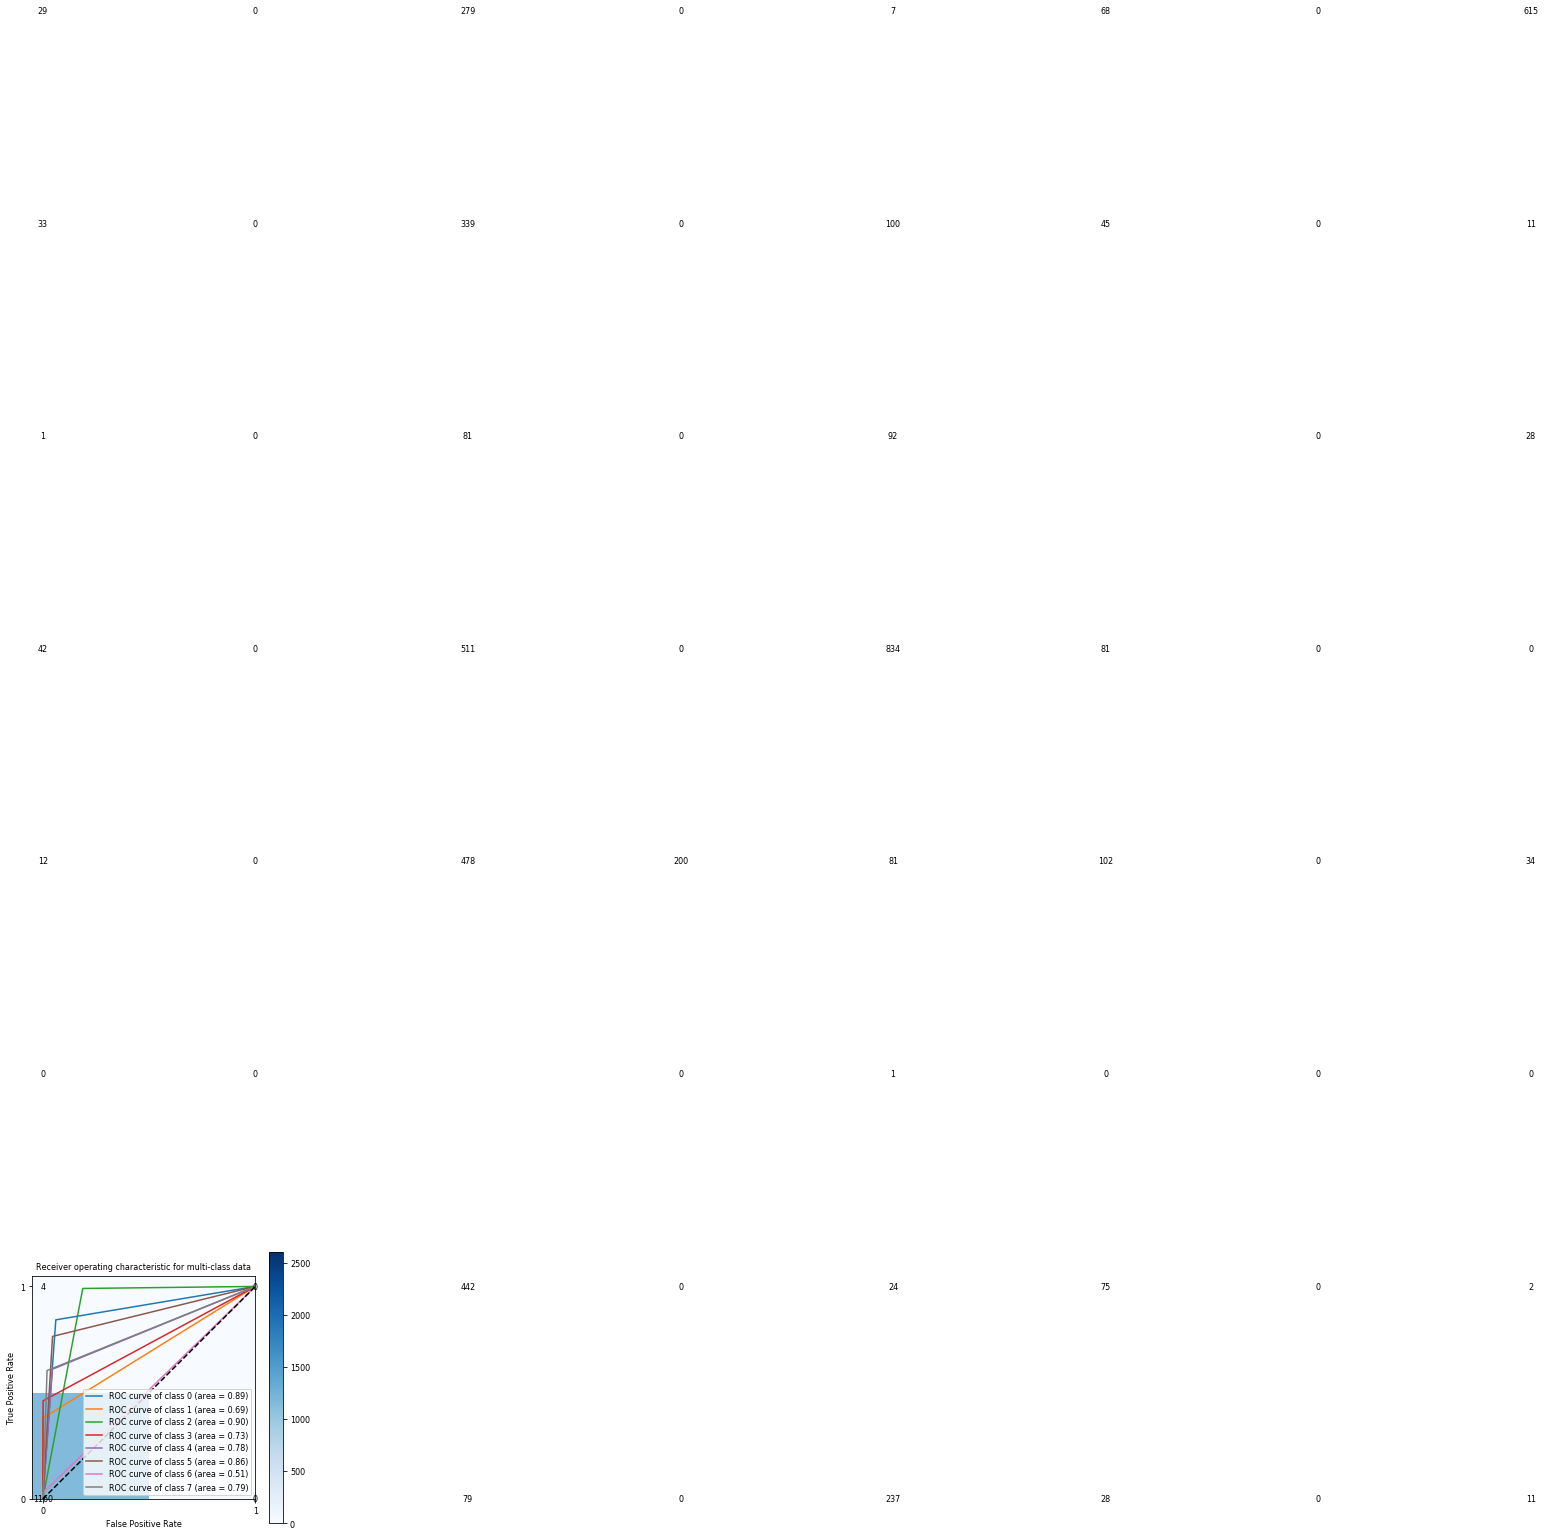

model beign processed =============================>  LGBMClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  35.9
Top 3 Accuracy Rate =  70.8
ROC-AUC score of the model   : 0.7812099749541443
F1 Score                     : 0.6351495864730614

Precision                    : 0.7837958212023034

Recall                       : 0.6077768697226769

Accuracy of the model        : 0.7076729802860456 

Confusion matrix             : 
[[1210    4  157    5   21   65    1   52]
 [  47  251  159    2   16   56    0   16]
 [  22    3 2410    0  153   10    0   13]
 [  75    2  199  454   52   65    1   59]
 [ 142    4  323    8  871  100    1   19]
 [ 106    4  178    8   78 1358    3   39]
 [ 136    5  156    5   85   45   58   38]
 [  62    3  159    5    3   55    0  711]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1515
           1       0.91      0.46      0.61       547
       

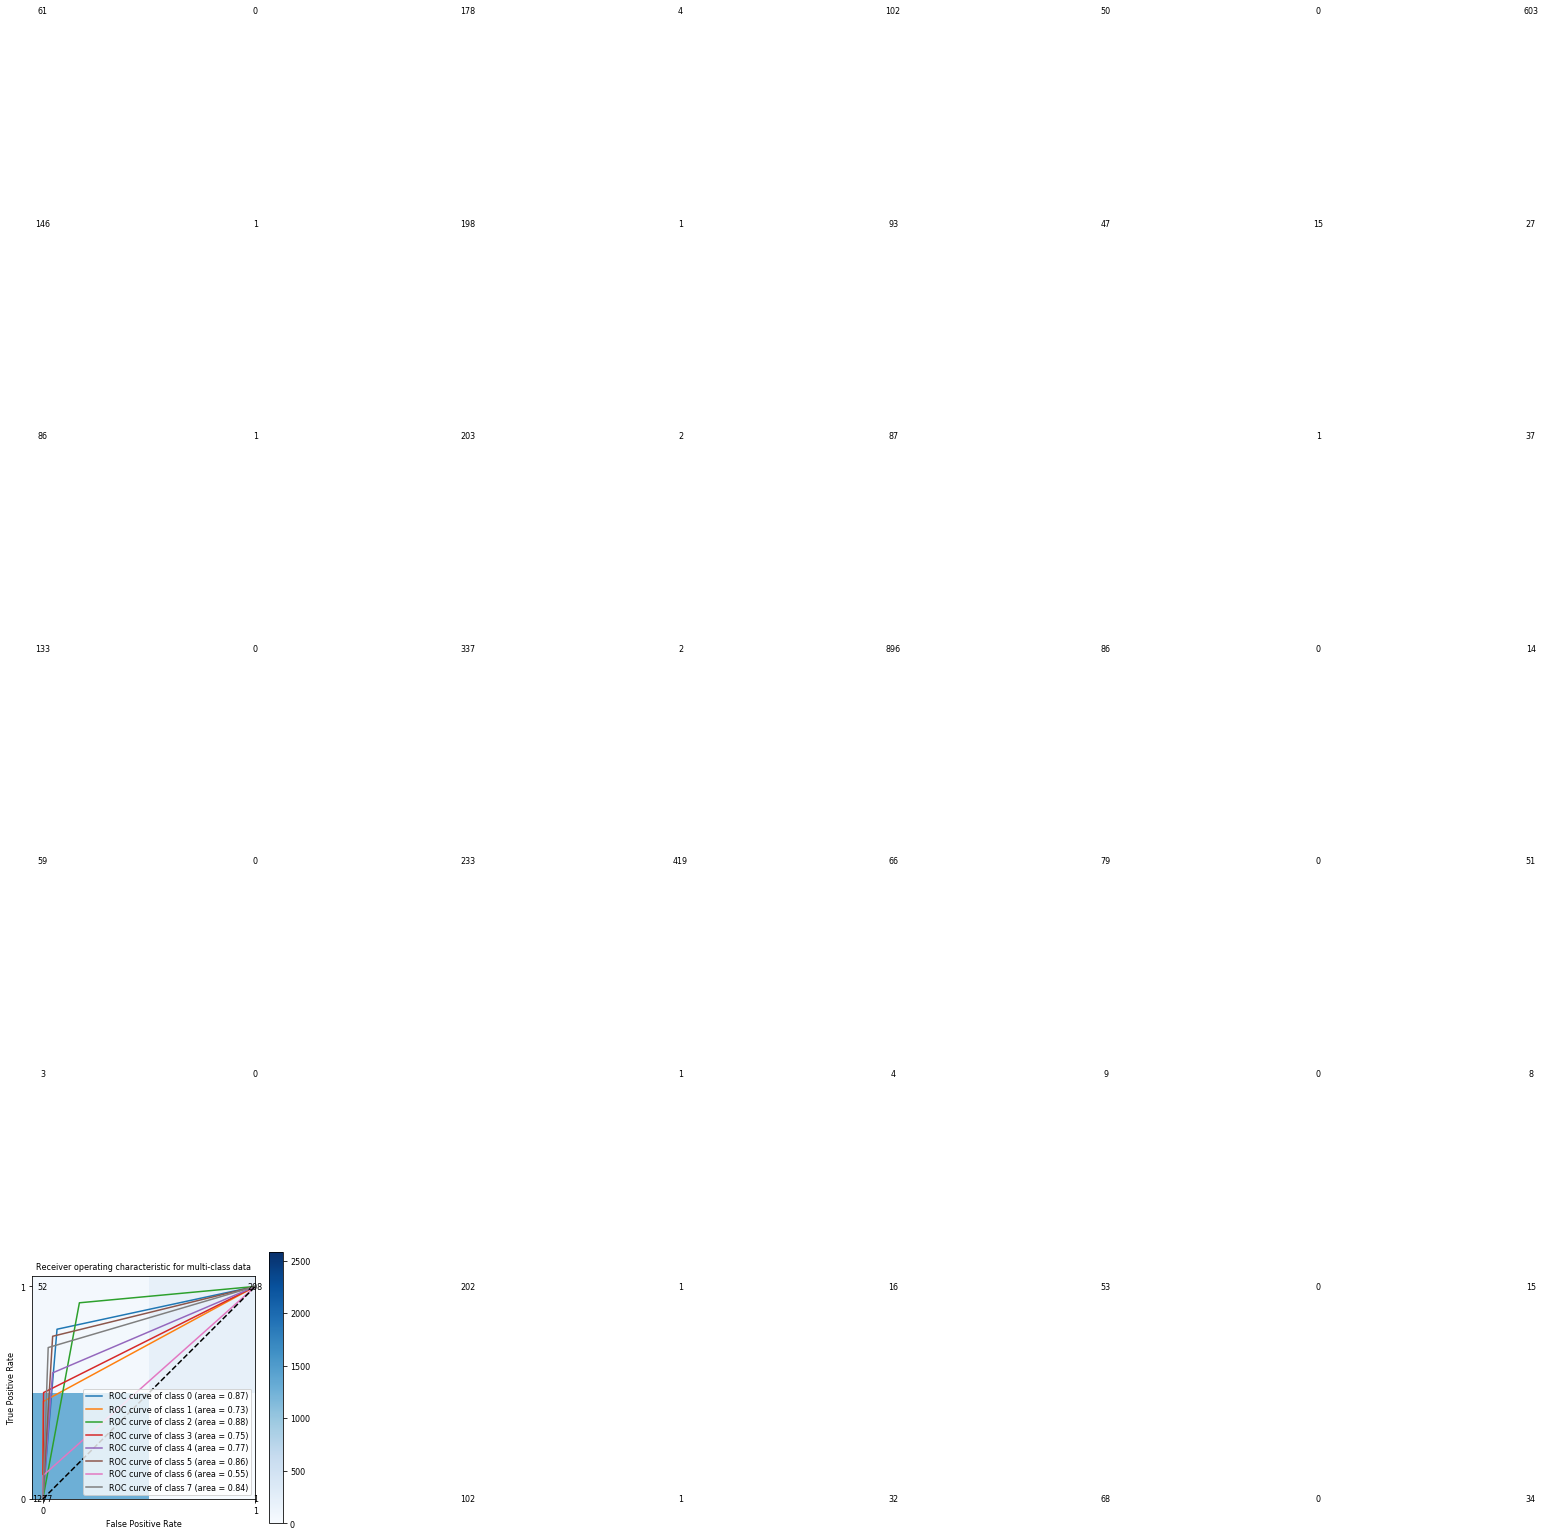

model beign processed =============================>  AdaBoostClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  34.599999999999994
Top 3 Accuracy Rate =  70.0
ROC-AUC score of the model   : 0.7668566275387467
F1 Score                     : 0.6044112132626747

Precision                    : 0.7848439094770032

Recall                       : 0.5804331104273137

Accuracy of the model        : 0.700231928875145 

Confusion matrix             : 
[[1215    2  149    4   26   75    1   43]
 [  42  231  199    1   18   47    0    9]
 [   5    2 2556    0    9   21    0   18]
 [  65    3  238  412   63   69    0   57]
 [ 139   10  306    3  910   85    0   15]
 [ 130    9  183    4   80 1332    0   36]
 [ 131    4  201    4   88   45   27   28]
 [  72   11  178    4  104   66    0  563]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1515
           1       0.85      0.42      0.56 

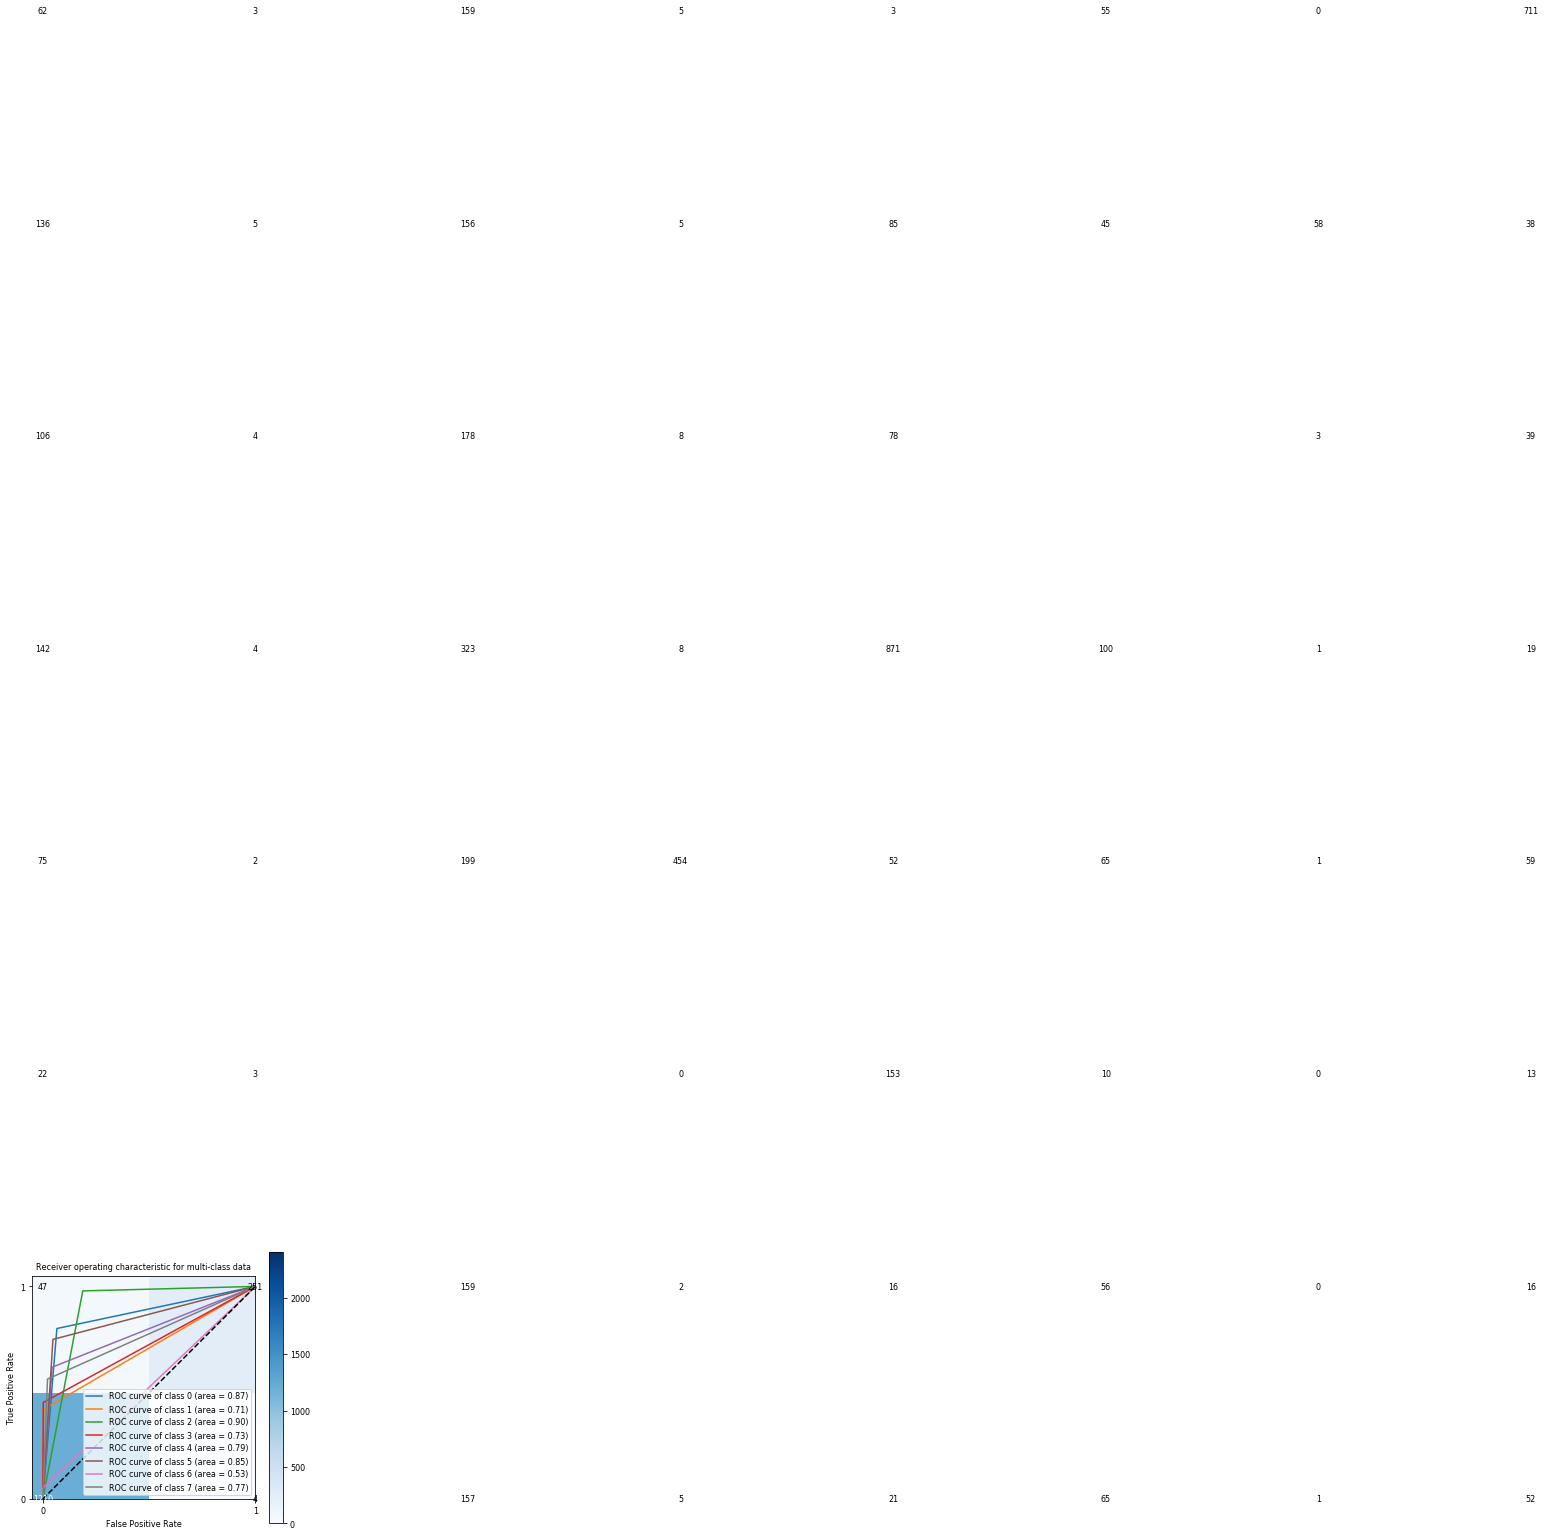

model beign processed =============================>  GradientBoostingClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.199999999999996
Top 3 Accuracy Rate =  71.0
ROC-AUC score of the model   : 0.7737597576207916
F1 Score                     : 0.6204868974953233

Precision                    : 0.7824039269913019

Recall                       : 0.5926790040996937

Accuracy of the model        : 0.7102821801314264 

Confusion matrix             : 
[[1233    2  135    5   14   71    0   55]
 [  46  236  187    0   14   47    1   16]
 [   7    3 2577    1    4   10    0    9]
 [  63    3  227  421   57   78    0   58]
 [ 137    2  306    5  919   86    0   13]
 [ 108    1  195    3   83 1340    4   40]
 [ 132    4  176    5   84   47   43   37]
 [  60    2  187   10  102   53    3  581]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1515
           1       0.93      0.43  

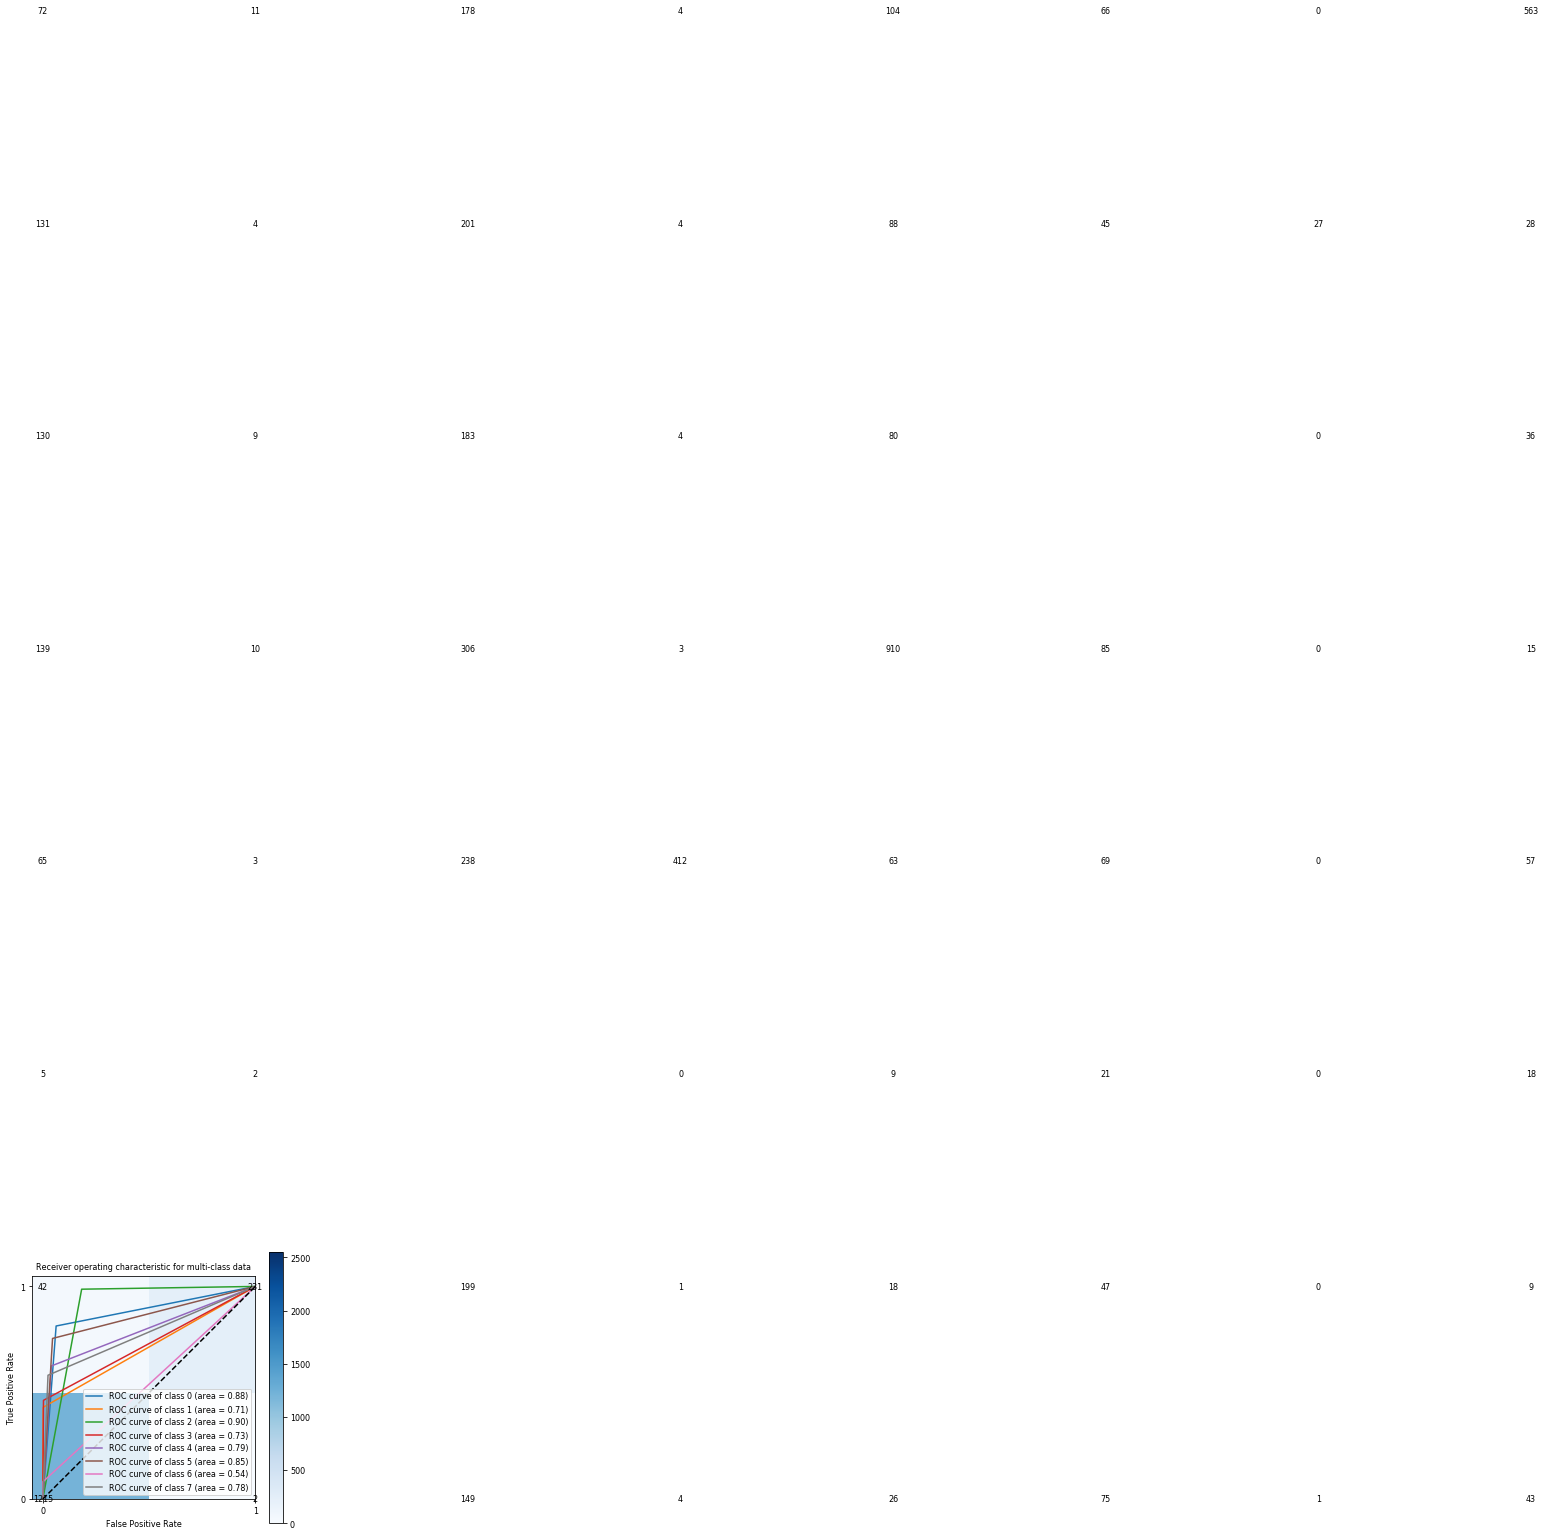

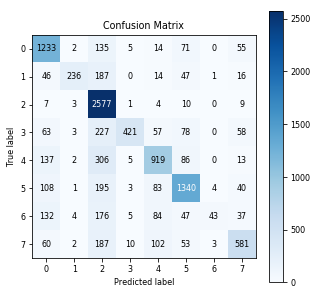

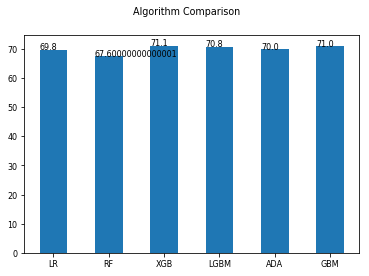

In [110]:
#func_models_tuned_one(features_selected_final)
func_models_one(features_selected_final)

##### Among all models with XGBM classifier is performing at par with all models

## 8.3  Calculating Metrics for XGBMClassifier

Results: 
Top 1 Accuracy Rate =  35.699999999999996
Top 3 Accuracy Rate =  71.1
ROC-AUC score of the model   : 0.7701367273175833
F1 Score                     : 0.6085118263372569

Precision                    : 0.8087490729620468

Recall                       : 0.5854321993243543

Accuracy of the model        : 0.7113451874758407 

Confusion matrix             : 
[[1277    1  102    1   32   68    0   34]
 [  52  208  202    1   16   53    0   15]
 [   3    0 2586    1    4    9    0    8]
 [  59    0  233  419   66   79    0   51]
 [ 133    0  337    2  896   86    0   14]
 [  86    1  203    2   87 1357    1   37]
 [ 146    1  198    1   93   47   15   27]
 [  61    0  178    4  102   50    0  603]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.70      0.84      0.77      1515
           1       0.99      0.38      0.55       547
           2       0.64      0.99      0.78      2611
           3       0.97      0.46     

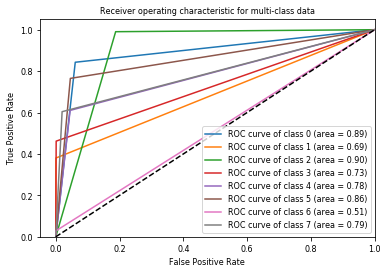

71.1

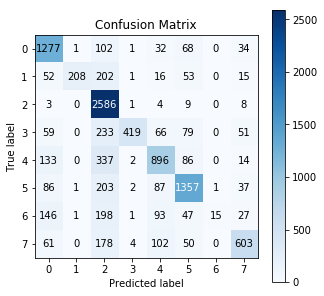

In [107]:
#lgbm_selected=LGBMClassifier().fit(x_train,Y_train)
metric_calc(XGBClassifier(),x_train,Y_train, x_test,Y_test)

## 8.4 Accuracy on train sample

In [156]:
#Reset the indexes on the validation sets — this is important later on
y_train_mod = Y_train.reset_index(drop=True)
x_train_mod = x_train.reset_index(drop=True)

Results: 
Top 1 Accuracy Rate =  36.1
Top 3 Accuracy Rate =  71.3
ROC-AUC score of the model   : 0.7752626593247924
F1 Score                     : 0.6298891890074285

Precision                    : 0.8080292040052268

Recall                       : 0.5955395796910343

Accuracy of the model        : 0.7130294025271194 

Confusion matrix             : 
[[ 4966     2   568    11   163   249     4   115]
 [  145   904   907     4    71   143     1    12]
 [   33     3 10260     1    48    41     4    55]
 [  276     4  1059  1539   288   298     0   167]
 [  535    17  1250    15  3725   334     2    30]
 [  355    12   672    11   388  5548     1   116]
 [  417    23   831     3   369   143   275    66]
 [  268    15   730    13   363   225     2  2296]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      6078
           1       0.92      0.41      0.57      2187
           2       0.63      0.98      0.7

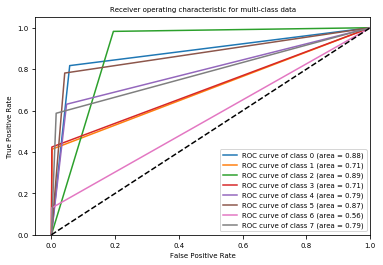

71.3

In [157]:
metric_calc(LogisticRegression(multi_class='multinomial', solver='newton-cg'),x_train,Y_train, x_train_mod,y_train_mod)

Results: 
Top 1 Accuracy Rate =  34.300000000000004
Top 3 Accuracy Rate =  69.1
ROC-AUC score of the model   : 0.7336042215700012
F1 Score                     : 0.5142362301276727

Precision                    : 0.6004684983809644

Recall                       : 0.5168694994727097

Accuracy of the model        : 0.6906090696045034 

Confusion matrix             : 
[[ 5379     0   332     0   285    44     0    38]
 [   20     0  1866     0    82   218     0     1]
 [    0     0 10431     0    14     0     0     0]
 [   91     0  1927   844   409   288     0    72]
 [  221     0  1945     0  3449   293     0     0]
 [   26     0   162     0   472  6384     0    59]
 [  261     0  1330     0   399   112     0    25]
 [  240     0  1019     0   386   169     0  2098]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6078
           1       0.00      0.00      0.00      2187
           2       0.55     

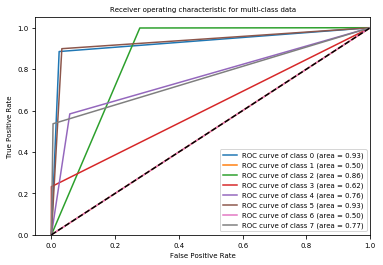

69.1

In [158]:
metric_calc(RandomForestClassifier(n_estimators=100, random_state=700,max_depth=5,max_features=4,criterion='gini'),x_train,Y_train, x_train_mod,y_train_mod)

Results: 
Top 1 Accuracy Rate =  37.1
Top 3 Accuracy Rate =  72.39999999999999
ROC-AUC score of the model   : 0.7811786321110528
F1 Score                     : 0.6344928097106606

Precision                    : 0.8198936415080005

Recall                       : 0.6055521568553663

Accuracy of the model        : 0.7243362083544732 

Confusion matrix             : 
[[ 5161     2   379     9    93   236     0   198]
 [  116   950   865     4    68   146     0    38]
 [    7     1 10323     1    42    39     0    32]
 [  199     5  1024  1592   269   316     0   226]
 [  503     8  1394    15  3583   349     1    55]
 [  264     5   609     7   360  5684     0   174]
 [  422    10   855     4   356   158   188   134]
 [  206     6   646    13   367   174     0  2500]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      6078
           1       0.96      0.43      0.60      2187
           2       0.64      

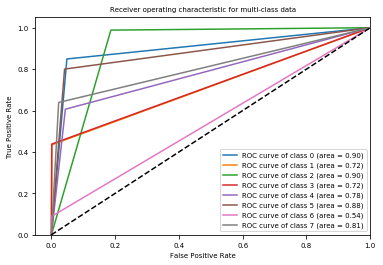

72.39999999999999

In [159]:
metric_calc(XGBClassifier(),x_train,Y_train, x_train_mod,y_train_mod)

Results: 
Top 1 Accuracy Rate =  40.8
Top 3 Accuracy Rate =  77.10000000000001
ROC-AUC score of the model   : 0.8230144230663488
F1 Score                     : 0.7172106580897262

Precision                    : 0.8258478301699166

Recall                       : 0.6814333288509926

Accuracy of the model        : 0.771472059143292 

Confusion matrix             : 
[[ 5290     9   332    16    54   176     7   194]
 [  150  1241   614     4    63    83     4    28]
 [   33     6 10265     0    77    25     3    36]
 [  216     9   605  2135   231   217    10   208]
 [  531    36  1135    14  3860   286     8    38]
 [  305    30   410     8   318  5855     9   168]
 [  375    23   577    11   320   125   584   112]
 [  198    19   475    13   338   158     9  2702]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      6078
           1       0.90      0.57      0.70      2187
           2       0.71      0

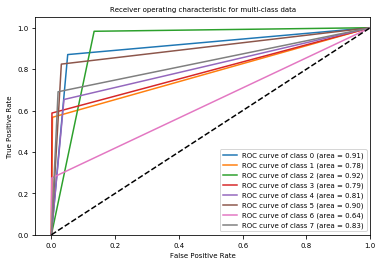

77.10000000000001

In [160]:
metric_calc(LGBMClassifier(),x_train,Y_train, x_train_mod,y_train_mod)

Results: 
Top 1 Accuracy Rate =  35.9
Top 3 Accuracy Rate =  71.3
ROC-AUC score of the model   : 0.7768764381442506
F1 Score                     : 0.6278793582423889

Precision                    : 0.8087453669910744

Recall                       : 0.5987487225101809

Accuracy of the model        : 0.7127394844289822 

Confusion matrix             : 
[[ 4998     5   496    23   132   274     0   150]
 [   69  1054   792     8    75   152     0    37]
 [   28     0 10241     1    56    52     0    67]
 [  246     7  1031  1548   261   314     0   224]
 [  475    12  1320    40  3677   322     1    61]
 [  335     6   807    18   368  5413     0   156]
 [  433     8   879     8   353   158   175   113]
 [  213     8   656    22   401   217     0  2395]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      6078
           1       0.96      0.48      0.64      2187
           2       0.63      0.98      0.7

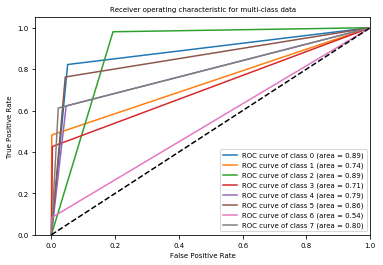

71.3

In [161]:
metric_calc(AdaBoostClassifier(),x_train,Y_train, x_train_mod,y_train_mod)

Results: 
Top 1 Accuracy Rate =  38.1
Top 3 Accuracy Rate =  73.3
ROC-AUC score of the model   : 0.7903911087897506
F1 Score                     : 0.6550260227587924

Precision                    : 0.8039335734855503

Recall                       : 0.6224480935264527

Accuracy of the model        : 0.7325988741513856 

Confusion matrix             : 
[[ 5152    14   386    14    84   224     2   202]
 [  162   993   785     5    69   133     2    38]
 [   16     2 10312     2    33    32     1    47]
 [  218    12   814  1789   244   306     5   243]
 [  538    33  1318    25  3576   361     7    50]
 [  293    19   583     9   353  5680     3   163]
 [  392    21   740     5   343   154   335   137]
 [  226    15   602    14   373   191     5  2486]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6078
           1       0.90      0.45      0.60      2187
           2       0.66      0.99      0.7

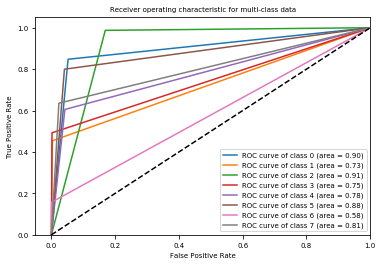

73.3

In [162]:
metric_calc(GradientBoostingClassifier(),x_train,Y_train, x_train_mod,y_train_mod)

# 9 . Final Model and Model Performance 

## 9.1 Evaluating XGBM model - GAINS CHART

In [121]:
group = Y_train.unique()
list_all= []
prob_data = pd.DataFrame()
data_train_e = pd.concat([x_train.reset_index(drop='True'),Y_train.reset_index(drop='True')],axis=1)
data_test_e = pd.concat([x_test.reset_index(drop='True'),Y_test.reset_index(drop='True')],axis=1)
j=len(group)
for k in range(0,j):
    idx = [name for name, index in intents_mapping.items() if index == k]
    #variable=[['ACCOUNTVALUE/SURRENDERVALUE'],['DUEDATE/AMOUNT'],['POLICYSTATUS-ACTIVE/LAPSE']]
    if idx ==['DUEDATE/AMOUNT'] :
        print('Intent -->',idx)
        data_new_train = features_clear_intent(data_train_e,group[k])
        data_new_test = features_clear_intent(data_test_e,group[k])
        target='CLEAN_INTENT'
        clf=XGBClassifier(n_estimators=10)
        clf.fit(x_train,data_new_train['CLEAN_INTENT'])
        scores_train = scoring(x_train,clf,data_new_train[target])
        scores_test = scoring(x_test,clf,data_new_test[target])
        print('scores_test--',scores_test.head())
        
        

Intent --> ['DUEDATE/AMOUNT']
scores_test--    SCORE  DECILE  TARGET  NONTARGET
0   0.29    3.00       0          1
1   0.24    6.00       1          0
2   0.25    6.00       0          1
3   0.26    5.00       0          1
4   0.25    5.00       0          1


### 9.1.1 Creating a Gain table.

In [122]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

   DECILE  TARGET  NONTARGET
0    9.00       0          1
1    4.00       0          1
2    3.00       1          0
3    6.00       0          1
4   10.00       0          1


,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,KS
DECILE,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0
1.0,4139,1504,2635,36.3373,1504,2635,25.6218,7.41815,18.2037
2.0,4139,909,3230,21.9618,2413,5865,41.1073,16.5114,24.596
3.0,4139,815,3324,19.6907,3228,9189,54.9915,25.8692,29.1223
4.0,4139,477,3662,11.5245,3705,12851,63.1175,36.1786,26.9389
5.0,4139,454,3685,10.9688,4159,16536,70.8518,46.5527,24.299
6.0,4139,438,3701,10.5823,4597,20237,78.3135,56.9719,21.3415
7.0,4139,405,3734,9.78497,5002,23971,85.2129,67.484,17.7289
8.0,4139,378,3761,9.13264,5380,27732,91.6525,78.0721,13.5803


In [123]:
deciling(scores_test,['DECILE'],'TARGET','NONTARGET')

   DECILE  TARGET  NONTARGET
0    3.00       0          1
1    6.00       1          0
2    6.00       0          1
3    5.00       0          1
4    5.00       0          1


,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,KS
DECILE,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0
1.0,1035,394,641,38.0676,394,641,26.8392,7.21847,19.6208
2.0,1035,217,818,20.9662,611,1459,41.6213,16.4302,25.1911
3.0,1035,199,836,19.2271,810,2295,55.1771,25.8446,29.3325
4.0,1034,108,926,10.4449,918,3221,62.5341,36.2725,26.2615
5.0,1035,94,941,9.08213,1012,4162,68.9373,46.8694,22.068
6.0,1035,96,939,9.27536,1108,5101,75.4768,57.4437,18.0331
7.0,1034,113,921,10.9284,1221,6022,83.1744,67.8153,15.3591
8.0,1035,105,930,10.1449,1326,6952,90.327,78.2883,12.0387


### 9.1.2 Lift chart, Actual vs predicted and Gains chart 

In [124]:
lift_train = pd.concat([x_train,scores_train],axis=1)
lift_test = pd.concat([x_test,scores_test],axis=1)

   DECILE  ACTUAL  PRED  DIST_TAR  LIFT
0   10.00   36.34 40.28     25.62  2.56
1   20.00   21.96 29.24     41.11  2.06
2   30.00   19.69 28.92     54.99  1.83
3   40.00   11.52 26.68     63.12  1.58
4   50.00   10.97 25.81     70.85  1.42


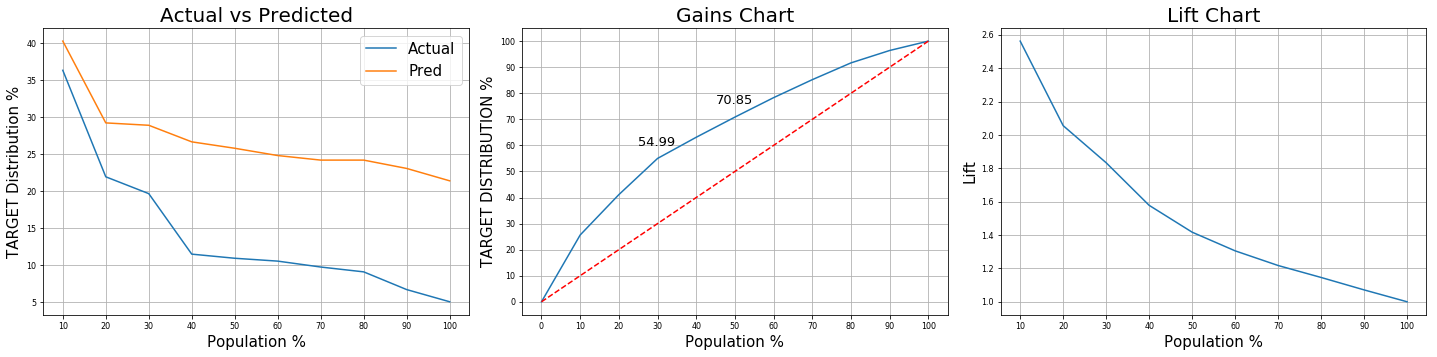

In [125]:
gains(lift_train,['DECILE'],'TARGET','SCORE')

   DECILE  ACTUAL  PRED  DIST_TAR  LIFT
0   10.00   38.07 41.39     26.84  2.68
1   20.00   20.97 29.24     41.62  2.08
2   30.00   19.23 28.90     55.18  1.84
3   40.00   10.44 26.65     62.53  1.56
4   50.00    9.08 25.72     68.94  1.38


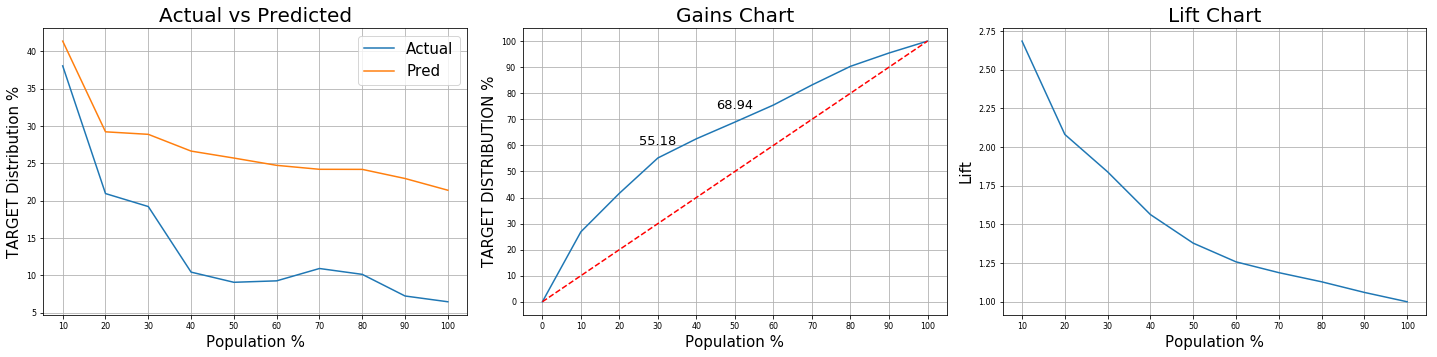

In [126]:
gains(lift_test,['DECILE'],'TARGET','SCORE')

## 9.2 Model Performance for predicting intent Individually( XGBM )

In [163]:
from sklearn import preprocessing
le_2 = preprocessing.LabelEncoder()
data_2['CLEAN_INTENT'] = le_2.fit_transform(data_2['CLEAN_INTENT'])
intents_mapping_n= {l : i for i,l in enumerate (le_2.classes_)}
intents_mapping_n

{'ACCOUNTVALUE/SURRENDERVALUE': 0,
 'BONUSINQUIRY': 1,
 'DUEDATE/AMOUNT': 2,
 'ECS/CREDITCARDINQUIRY': 3,
 'LOANENQUIRY': 4,
 'PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE': 5,
 'POLICYPACKDISPATCHSTATUS/CLARIFICATION': 6,
 'POLICYSTATUS-ACTIVE/LAPSE': 7,
 'POSREQUESTSTATUSREQUIRED': 8,
 'PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY': 9,
 'PREMIUMRECEIPTREQUEST': 10,
 'PROBABLESURRENDER': 11,
 'STATUSOFTHEPROPOSAL': 12}

In [164]:
x_train_n, x_test_n, Y_train_n, Y_test_n = train_test_split(data_2.drop("CLEAN_INTENT", axis=1), data_2['CLEAN_INTENT'], test_size = 0.2,random_state=590, stratify=data_2['CLEAN_INTENT'])  

In [165]:
x_train_n=x_train_n[features_selected_final]
x_test_n=x_test_n[features_selected_final]

In [168]:
group = Y_train_n.unique()
list_all= []
data_train_1 = pd.concat([x_train_n.reset_index(drop='True'),Y_train_n.reset_index(drop='True')],axis=1)
data_test_1 = pd.concat([x_test_n.reset_index(drop='True'),Y_test_n.reset_index(drop='True')],axis=1)
j=len(group)
for k in group:
    idx = [name for name, index in intents_mapping_n.items() if index == k]
    print('Intent -->',idx)
    data_new_train = features_clear_intent(data_train_1,group[k])
    data_new_test = features_clear_intent(data_test_1,group[k])
    target='CLEAN_INTENT'
    xgb_1 =   XGBClassifier(n_estimators=10)
    xgb_1.fit(x_train_n,data_new_train['CLEAN_INTENT'])
    Y_pred=xgb_1.predict(x_test_n)       
    print('Accuracy-->',round(accuracy_score(data_new_test['CLEAN_INTENT'], Y_pred)*100),2)

Intent --> ['PREMIUMRECEIPTREQUEST']
Accuracy--> 0.9
Intent --> ['POSREQUESTSTATUSREQUIRED']
Accuracy--> 0.95
Intent --> ['DUEDATE/AMOUNT']
Accuracy--> 0.98
Intent --> ['POLICYSTATUS-ACTIVE/LAPSE']
Accuracy--> 0.94
Intent --> ['ACCOUNTVALUE/SURRENDERVALUE']
Accuracy--> 0.95
Intent --> ['ECS/CREDITCARDINQUIRY']
Accuracy--> 0.86
Intent --> ['PROBABLESURRENDER']
Accuracy--> 0.91
Intent --> ['PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY']
Accuracy--> 0.86
Intent --> ['BONUSINQUIRY']
Accuracy--> 0.85
Intent --> ['LOANENQUIRY']
Accuracy--> 0.85
Intent --> ['PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE']
Accuracy--> 0.83
Intent --> ['STATUSOFTHEPROPOSAL']
Accuracy--> 0.84
Intent --> ['POLICYPACKDISPATCHSTATUS/CLARIFICATION']
Accuracy--> 0.84


# 10 Predictions - TOP 3 intents for TEST data

In [163]:
# TOP-3

def predict_top3_classes(classifier, x_test, valid_y):
    n = 3
    classifier.probability = True
    probas = classifier.predict_proba(x_test)
    predictions = classifier.predict(x_test)
    top_n_predictions = np.argsort(probas, axis = 1)[:,-n:] #probability 
    top_class = classifier.classes_[top_n_predictions]#classes
    top_n_predictions=top_n_predictions.sort()

    top_class_df = pd.DataFrame(data=top_class)
    top_class_df.rename(columns={"0": "Top-3", "1": "Top-2", "2": "Top-1"})
    predictions_df= pd.DataFrame(data=predictions)

    results = pd.merge( X_test, valid_y, left_index=True, right_index=True)
    results = pd.merge(results, top_class_df, left_index=True, right_index=True)
    return results

In [165]:
xgbm_tuned=XGBClassifier().fit(x_train,Y_train)
top_3_intents=predict_top3_classes(xgbm_tuned,x_test, Y_test)
top_3_intents

,CLI_HNI_IND_N,POS_COUNT,SCP_EML_SCP_EM_1,POLICY_CHNL_01,ECS_FLAG_Yes,ECS_FLAG_No,CLI_EDUCATION_CAT_04,POLICY_CHNL_05,PLAN_TYPE_01,UNO_EML_SYS,...,SCP_SMS_PREMIUM PAYMENT,HELP_LINE_SYS,SCP_SMS_SYS,new_policy,REN_COUNT,SCP_EML_SYS,CLEAN_INTENT,0,1,2
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,7,2,7,4
1,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,3,1,4,5,3,2
2,1,0,0,1,1,0,1,0,1,1,...,0,0,0,0,0,1,7,5,4,0
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,5,2,0,5
4,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,5,1,2,5
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,2,0,4
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,3,2,5
7,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,4,5,0,2
8,1,0,0,1,1,0,0,0,1,0,...,0,0,1,0,2,1,6,5,0,2
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,2,4,7


# 11 Save Model for future use

In [145]:
from collections import defaultdict
from sklearn.externals import joblib
d = defaultdict(preprocessing.LabelEncoder)
filename = 'final_model.model'
i = [d,xgbm_tuned]
joblib.dump(i,filename)

['final_model.model']

# 12 Predicting the score 

In [141]:
# Use the code to load the model
filename = 'final_model.model'

from sklearn.externals import joblib
d,xgbm_tuned=joblib.load(filename)

#### Score New data


In [142]:
def score_new(features,model):
    score = pd.DataFrame(model.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    return(score)

In [143]:
### For a new file named "new_score_data" can be justed called to have the score generated

In [ ]:
scores = score_new(new_score_data,lgbm)

In [172]:
from sklearn.linear_model import LogisticRegression
logit_sk  = LogisticRegression(fit_intercept = False, C = 1e9)
result_sk=logit_sk.fit(x_train, Y_train) 
features_variable=(list(zip(result_sk.coef_[0], x_train)))

In [173]:
features_variable.sort()

In [174]:
features_variable

[(-1.9054489200757865, 'new_policy'),
 (-1.402554801552114, 'UNO_EML_SYS'),
 (-1.2928362885528106, 'ECS_FLAG_No'),
 (-0.8902661168931851, 'MON_CLEARANCE_COUNT'),
 (-0.8890843748424099, 'ECS_FLAG_Yes'),
 (-0.8616574076342717, 'SCP_SMS_PROPOSAL'),
 (-0.6844898017589458, 'HELP_LINE_SYS'),
 (-0.6193334282931263, 'PLAN_CAT_03'),
 (-0.5083437556217397, 'MON_BOUNCE_COUNT'),
 (-0.4974576585813376, 'SCP_EML_SYS'),
 (-0.4822338085853459, 'DUE_DATE_SYS'),
 (-0.4311865594214724, 'POS_COUNT'),
 (-0.34839309520492917, 'SCP_SMS_SYS'),
 (-0.21983941326506082, 'SCP_SMS_PREMIUM PAYMENT'),
 (-0.16812358705732913, 'CLI_EDUCATION_CAT_03'),
 (-0.14274914829541974, 'CLI_OCCUPATION_CAT_02'),
 (-0.11043128498070065, 'INCOME_BUK_03'),
 (-0.10089514137364652, 'REN_COUNT'),
 (0.08936347130321934, 'CLI_SNGL_MLTPL_PLCYHLDR_FLG_SINGLE'),
 (0.10461218153979063, 'POLICY_CHNL_05'),
 (0.17657469391544972, 'PLAN_TYPE_01'),
 (0.19675168457816472, 'CLI_HNI_IND_N'),
 (0.24453991747010986, 'PLAN_FAMILY_16'),
 (0.252278054354